In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, peak_signal_noise_ratio
import numpy as np

In [3]:
def plot_model_results(batch_speckle, batch_clean, batch_pred):
    n = batch_speckle.shape[0]

    for i in range(n):
        fig, axes = plt.subplots(
        nrows = 2,
        ncols = 4, 
        figsize = (16, 8))

        print('-------------------------------------------------------------------------------------------')
        print('Test', i)

        axes[0,0].imshow(batch_speckle[i,...,0], cmap='gray')
        axes[0,0].set_title('Input with speckle')
        axes[0,1].imshow(batch_clean[i,...,0], cmap='gray')
        axes[0,1].set_title('Ground truth')
        axes[0,2].imshow(batch_pred[i,...,0], cmap='gray')
        axes[0,2].set_title('Model Prediction')
        diff = np.abs(batch_pred[i,...,0] - batch_clean[i,...,0])
        axes[0,3].imshow(diff, vmin=np.min(diff), vmax=np.max(diff), cmap='gray')
        axes[0,3].set_title('|Model Prediction - Ground Truth|')

        axes[1,0].hist(batch_speckle[i,...,0].flatten(), bins=20, histtype='step')
        axes[1,0].set_title('Input with speckle')
        axes[1,1].hist(batch_clean[i,...,0].flatten(), bins=20, histtype='step')
        axes[1,1].set_title('Ground truth')
        axes[1,2].hist(batch_pred[i,...,0].flatten(), bins=20, histtype='step')
        axes[1,2].set_title('Model Prediction')
        axes[1,3].hist(diff.flatten(), bins=20, histtype='step')
        axes[1,3].set_title('|Model Prediction - Ground Truth|')
    
        plt.show()
        plt.close()

def compute_metrics(batch_speckle, batch_clean, batch_pred):
    n = batch_speckle.shape[0]
    
    print('===========================================================================================================================================')
    print('  Test \t\t Metric\t\tGrount Truth VS Grount Truth \t\t Grount Truth VS Input \t\t Grount Truth VS Model Prediction')
    print('-------------------------------------------------------------------------------------------------------------------------------------------')
    for i in range(n):
        gt_vs_gt = peak_signal_noise_ratio(batch_clean[i, ...,0], batch_clean[i, ...,0], data_range=1.0)
        gt_vs_in  = peak_signal_noise_ratio(batch_clean[i, ...,0], batch_speckle[i,...,0], data_range=1.0)
        gt_vs_pred  = peak_signal_noise_ratio(batch_clean[i, ...,0], batch_pred[i,...,0], data_range=1.0)

        print('   %i  \t\t  PSNR \t\t             %.2f             \t\t             %.2f      \t\t             %.2f' % (i, gt_vs_gt, gt_vs_in, gt_vs_pred))
        
        gt_vs_gt = structural_similarity(batch_clean[i, ...,0], batch_clean[i, ...,0], data_range=1.0)
        gt_vs_in  = structural_similarity(batch_clean[i, ...,0], batch_speckle[i,...,0], data_range=1.0)
        gt_vs_pred  = structural_similarity(batch_clean[i, ...,0], batch_pred[i,...,0], data_range=1.0)
        print('   %i  \t\t  PSNR \t\t             %.2f             \t\t             %.2f      \t\t             %.2f' % (i, gt_vs_gt, gt_vs_in, gt_vs_pred))
        print('-------------------------------------------------------------------------------------------------------------------------------------------')

In [4]:
import sys
sys.path.append('speckle2void')
sys.path.append('SAR2SAR-GRD-test')
sys.path.insert(0, './libraries')

In [5]:
from DatasetHandler import DatasetHandler

In [6]:
handler = DatasetHandler('dataset')
print("Training dataset size: ", len(handler.train_paths))
print("Validation dataset size: ", len(handler.val_paths))
print("Testing dataset size: ", len(handler.test_paths))

Training dataset size:  3188
Validation dataset size:  765
Testing dataset size:  54


In [7]:
IMG_SHAPE = (96,96,1)

In [8]:
batch_speckle, batch_clean = handler.data_loader_v2(
    paths      = handler.test_paths, 
    img_shape  = IMG_SHAPE)

# Speckle 2 void

In [9]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from Speckle2Void import Speckle2V

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
tf.reset_default_graph()
batch_size=16

dir_train = None
dir_test = None

file_checkpoint = 'speckle2void/s2v_checkpoint/model.ckpt-299999'#None for the latest checkpoint

model = Speckle2V(dir_train,
                  dir_test,
                  file_checkpoint,
                  batch_size=batch_size,
                  patch_size=64,
                  model_name='speckle2void',
                  lr=1e-04, 
                  steps_per_epoch=2000,
                  k_penalty_tv=5e-05,
                  shift_list=[3,1],
                  prob = [0.9,0.1],
                  clip=1,
                  norm=1,
                  L_noise=1)   

In [12]:
model.build_inference()
model.load_weights()

Instructions for updating:
Colocations handled automatically by placer.


/Users/alessandrosebastianelli/Desktop/CNNSpeckleFilter/filterenv/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:308: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  '`tf.layers.batch_normalization` is deprecated and '
/Users/alessandrosebastianelli/Desktop/CNNSpeckleFilter/filterenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Taking the specified checkpoint...
INFO:tensorflow:Restoring parameters from speckle2void/s2v_checkpoint/model.ckpt-299999


In [13]:
batch_pred = model.predict(batch_speckle)

-------------------------------------------------------------------------------------------
Test 0


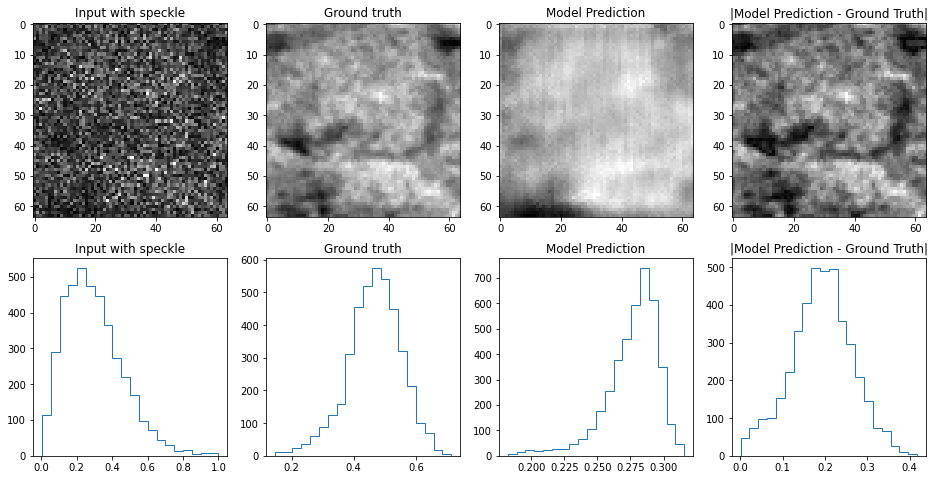

-------------------------------------------------------------------------------------------
Test 1


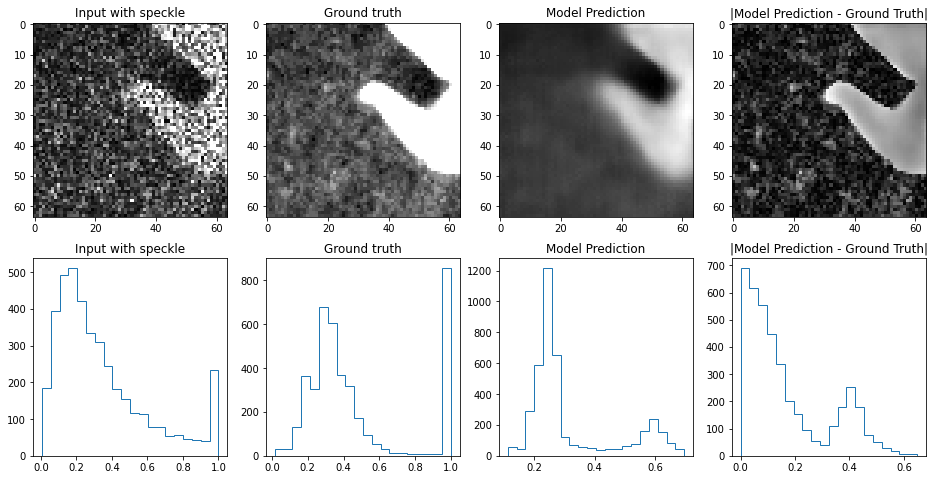

-------------------------------------------------------------------------------------------
Test 2


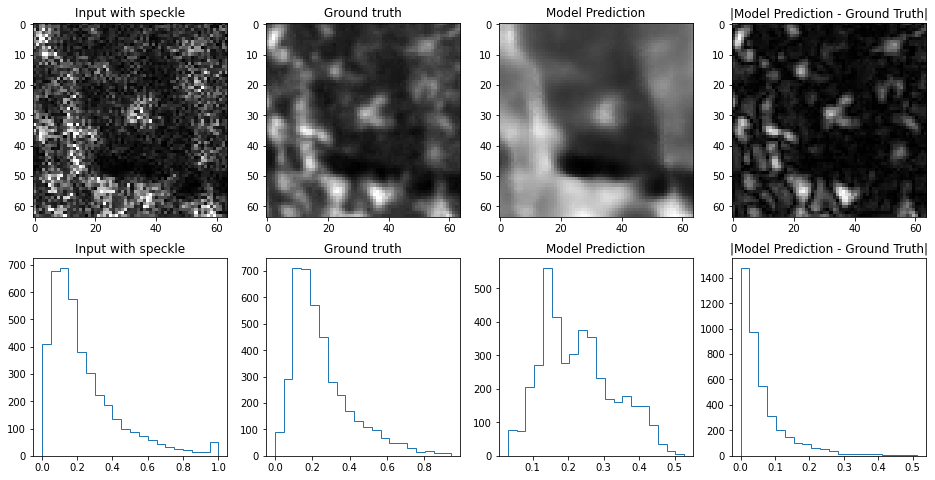

-------------------------------------------------------------------------------------------
Test 3


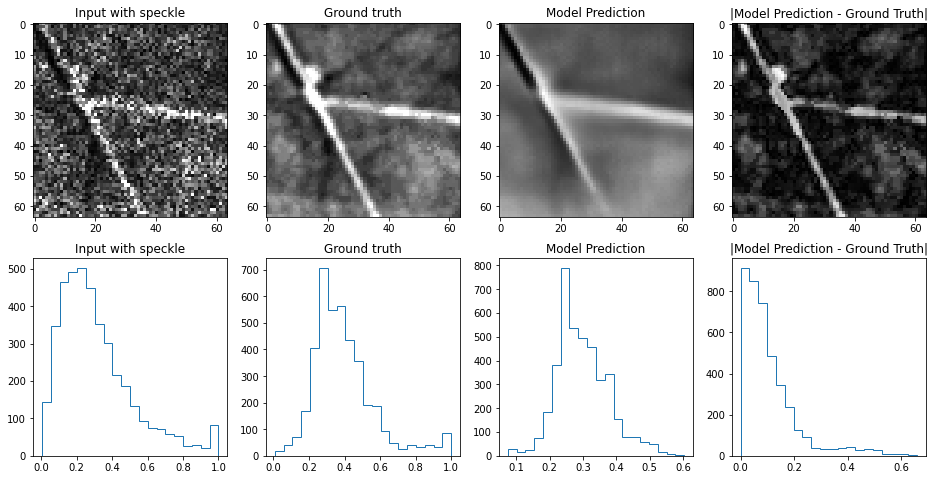

-------------------------------------------------------------------------------------------
Test 4


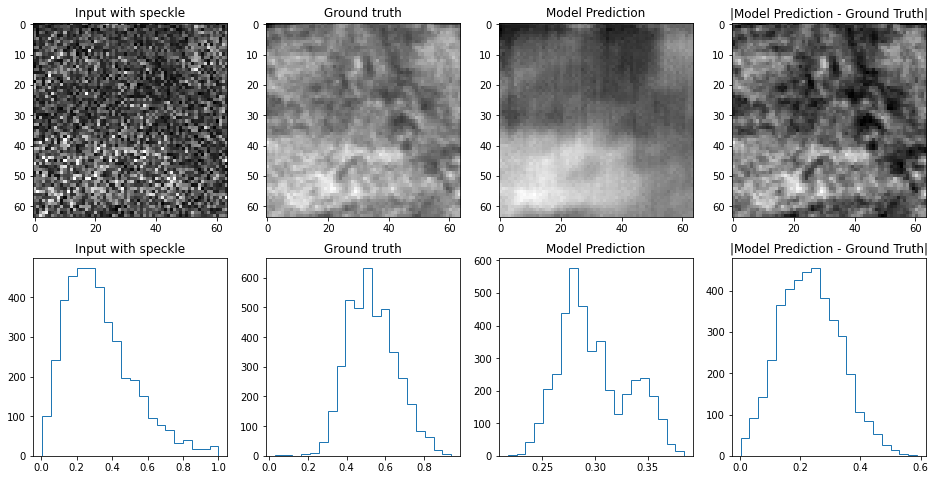

-------------------------------------------------------------------------------------------
Test 5


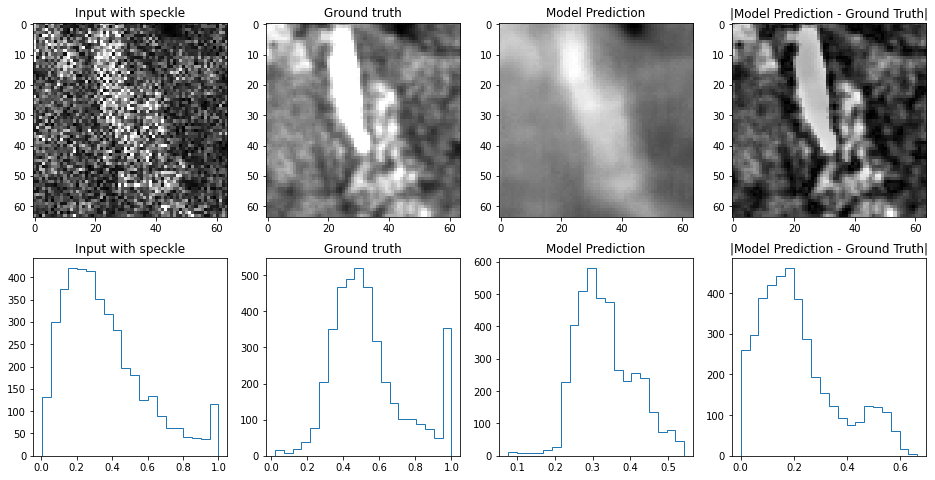

-------------------------------------------------------------------------------------------
Test 6


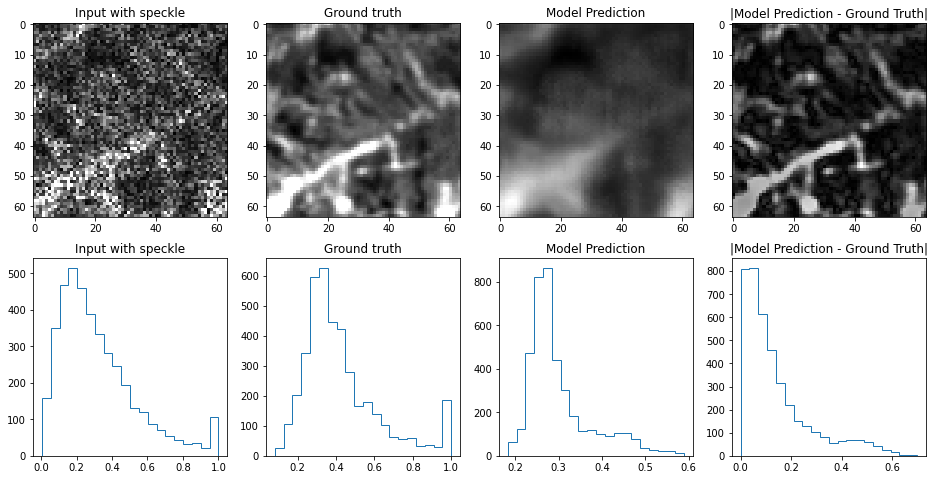

-------------------------------------------------------------------------------------------
Test 7


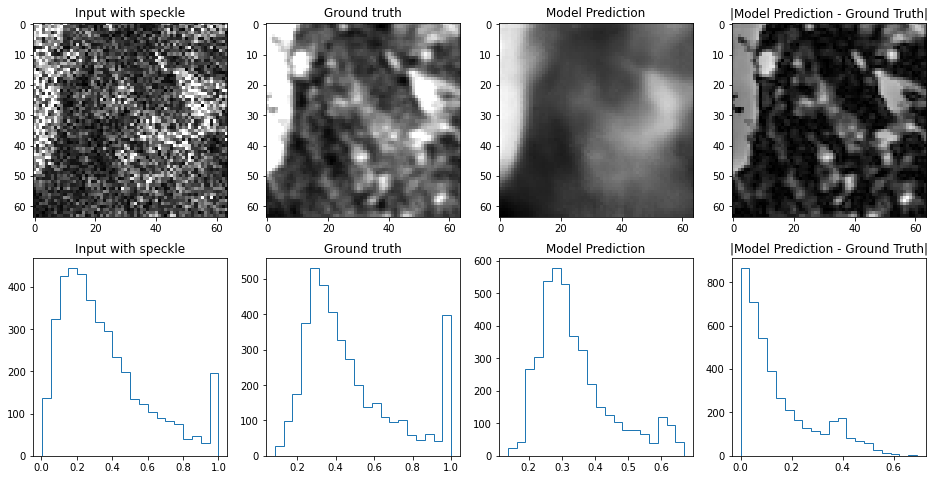

-------------------------------------------------------------------------------------------
Test 8


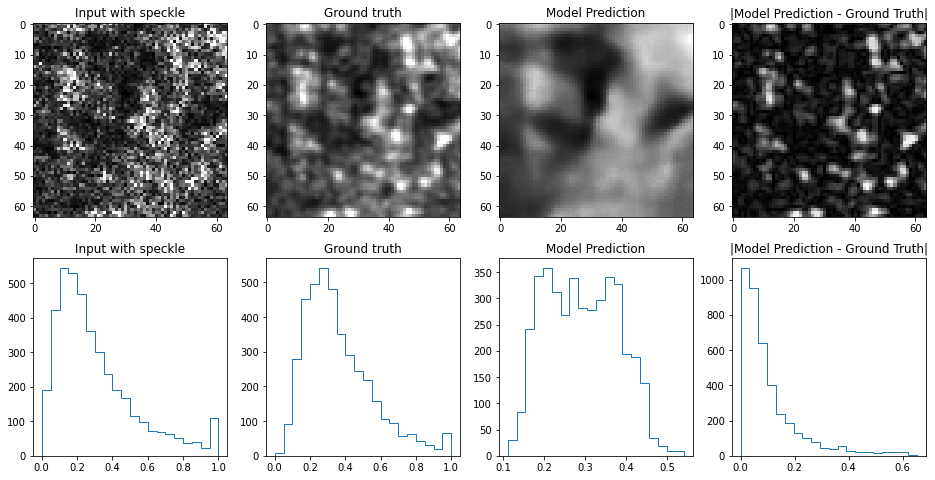

-------------------------------------------------------------------------------------------
Test 9


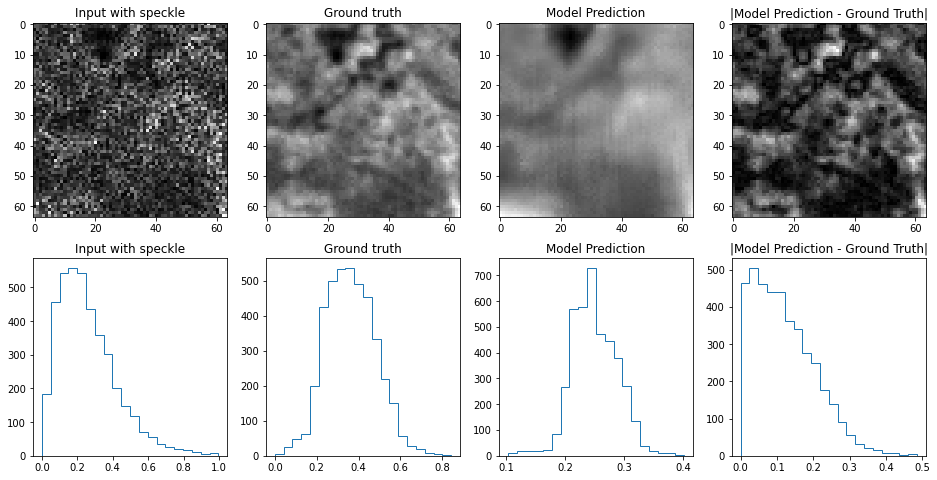

-------------------------------------------------------------------------------------------
Test 10


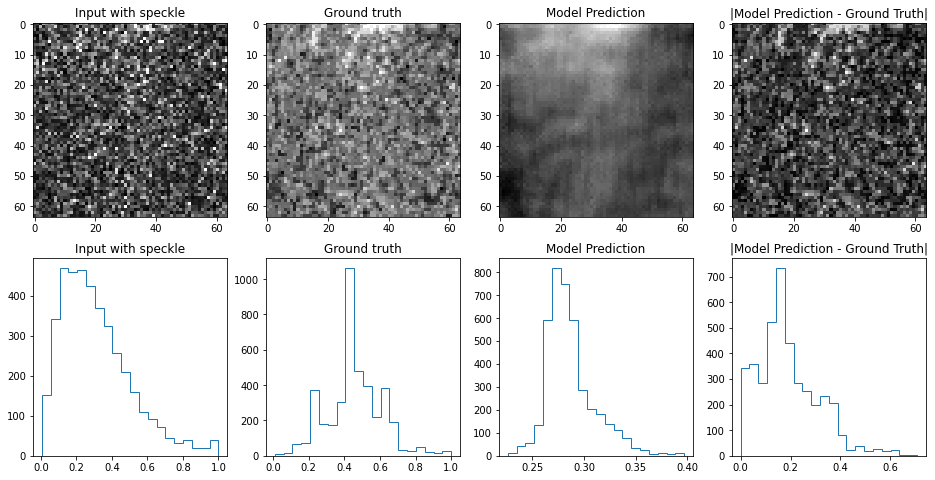

-------------------------------------------------------------------------------------------
Test 11


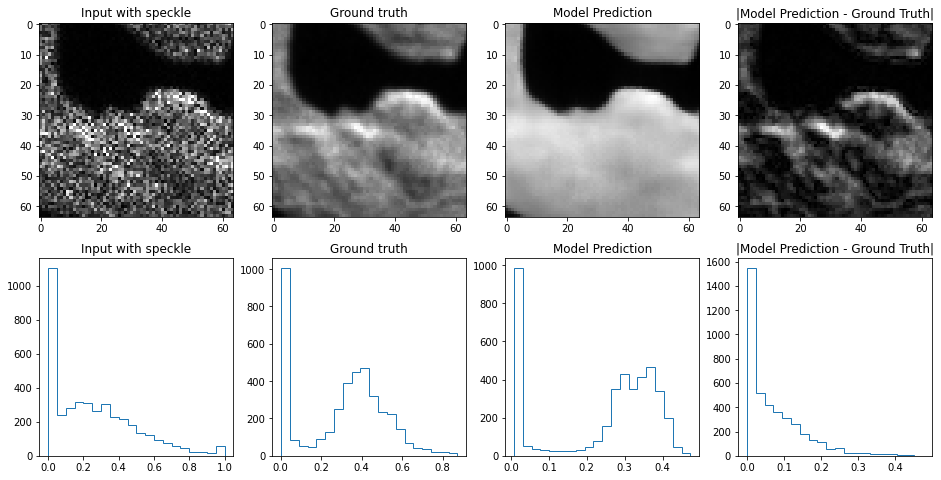

-------------------------------------------------------------------------------------------
Test 12


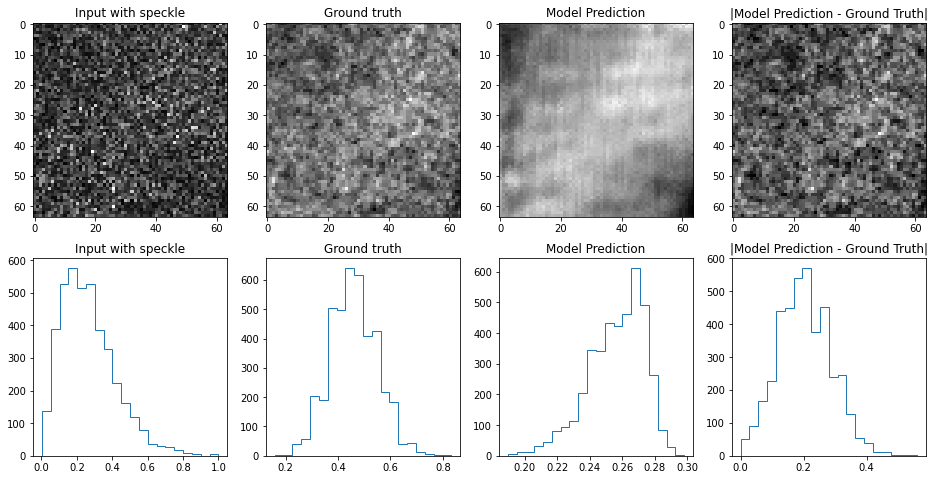

-------------------------------------------------------------------------------------------
Test 13


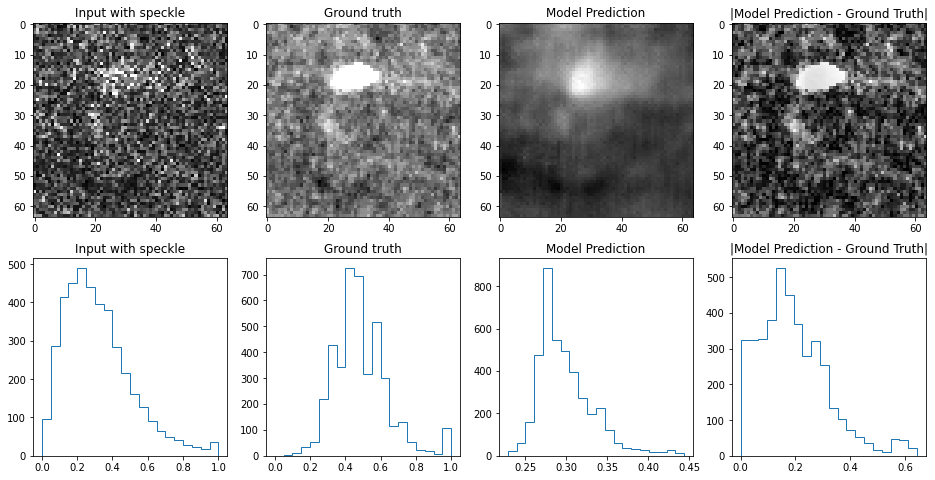

-------------------------------------------------------------------------------------------
Test 14


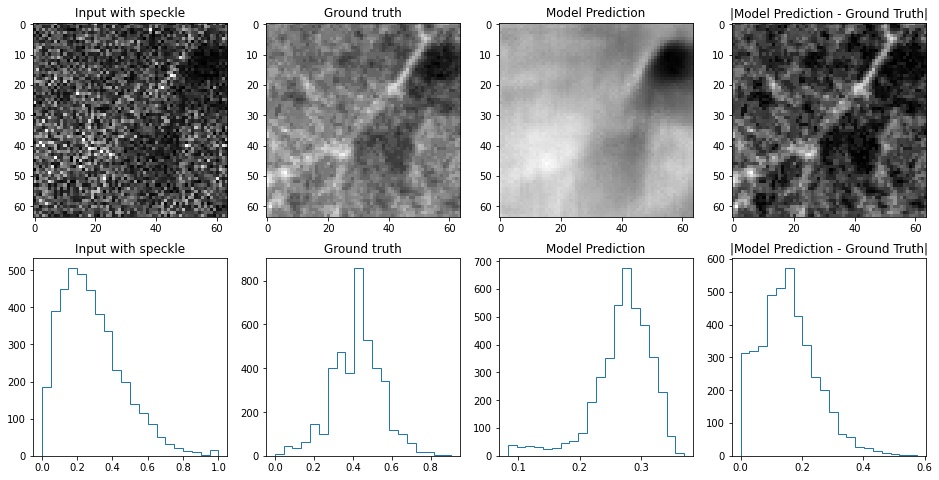

-------------------------------------------------------------------------------------------
Test 15


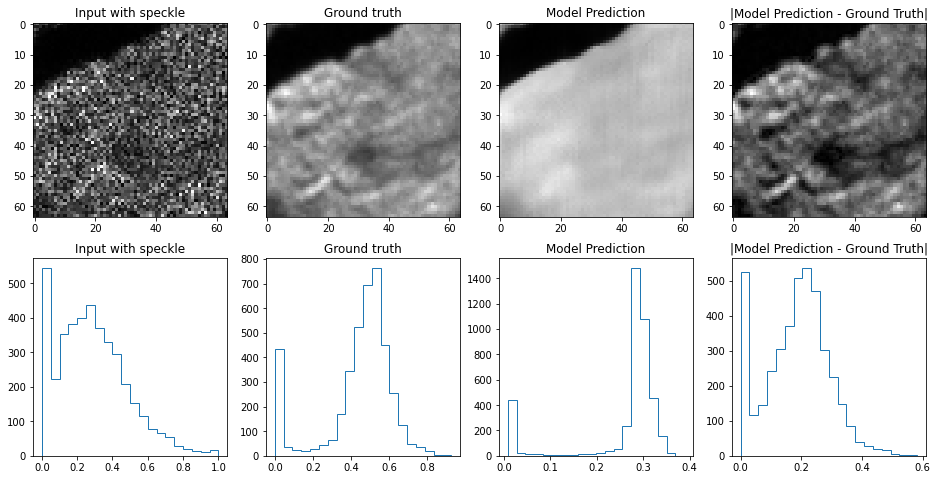

-------------------------------------------------------------------------------------------
Test 16


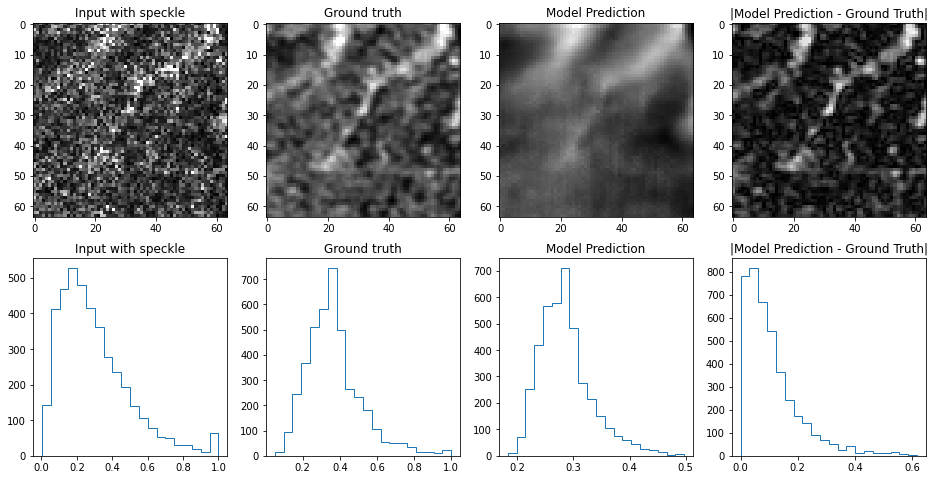

-------------------------------------------------------------------------------------------
Test 17


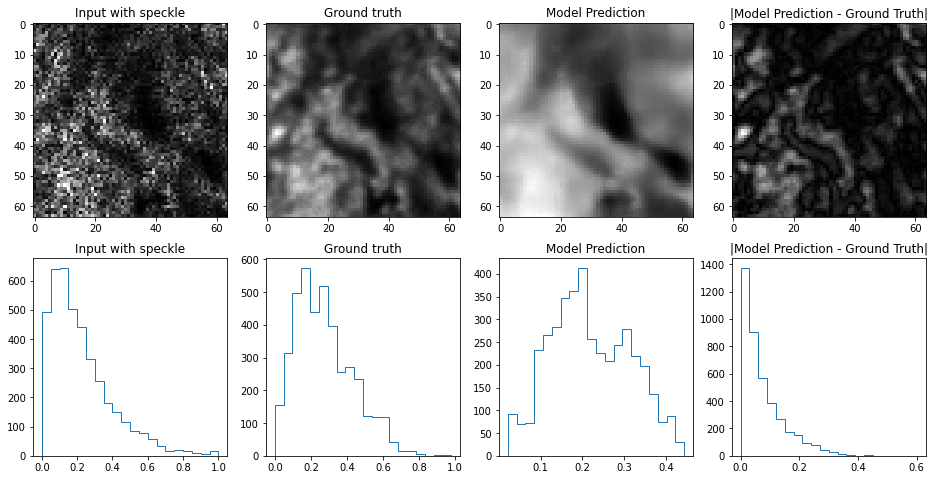

-------------------------------------------------------------------------------------------
Test 18


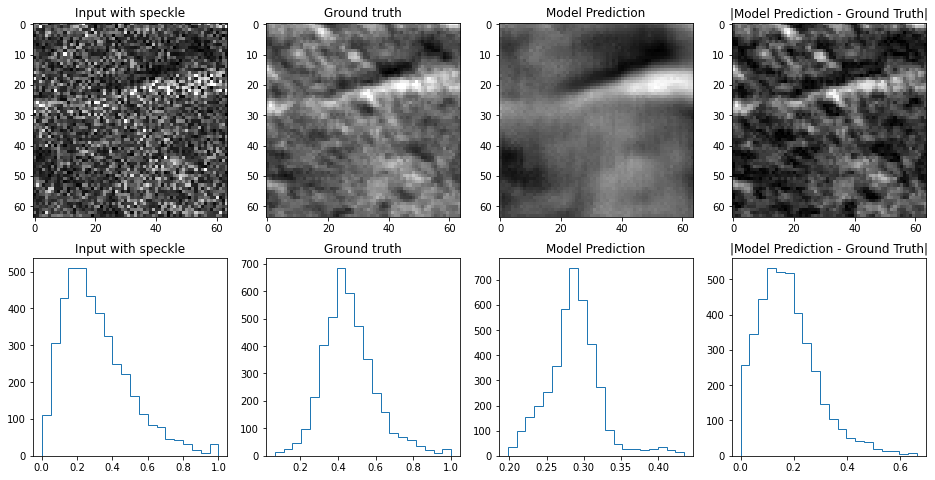

-------------------------------------------------------------------------------------------
Test 19


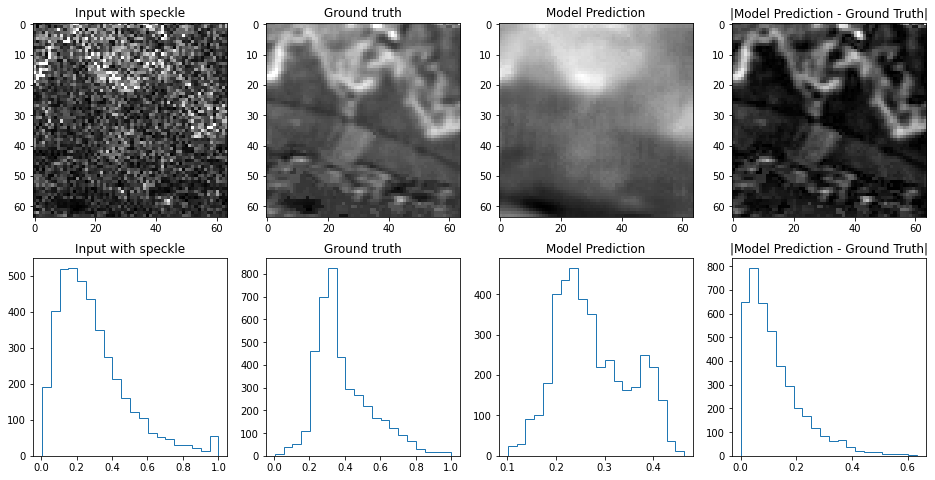

-------------------------------------------------------------------------------------------
Test 20


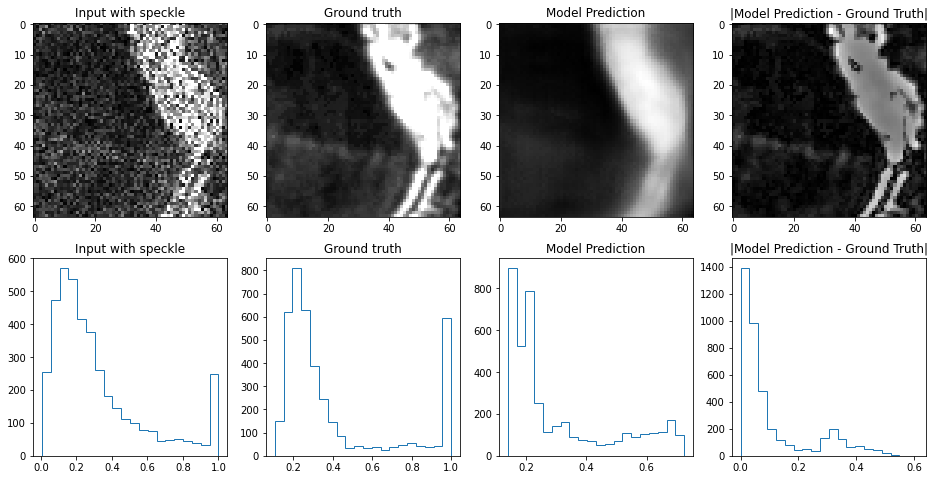

-------------------------------------------------------------------------------------------
Test 21


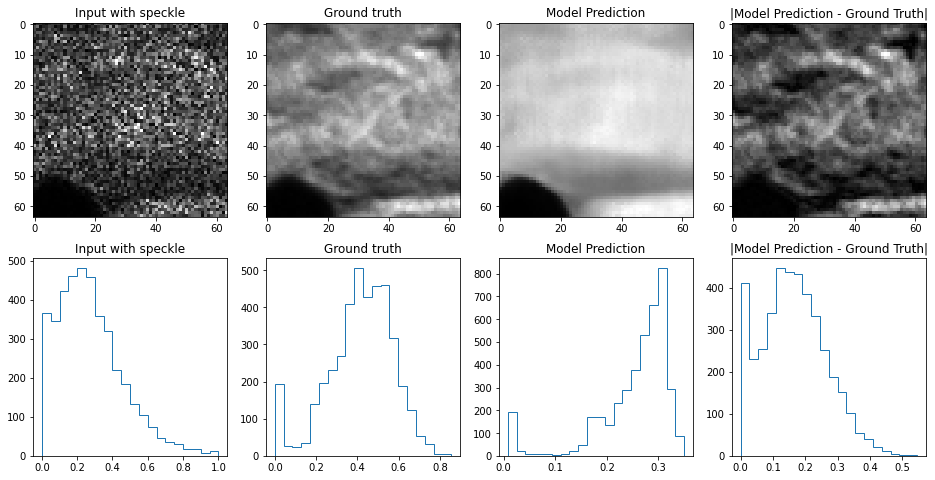

-------------------------------------------------------------------------------------------
Test 22


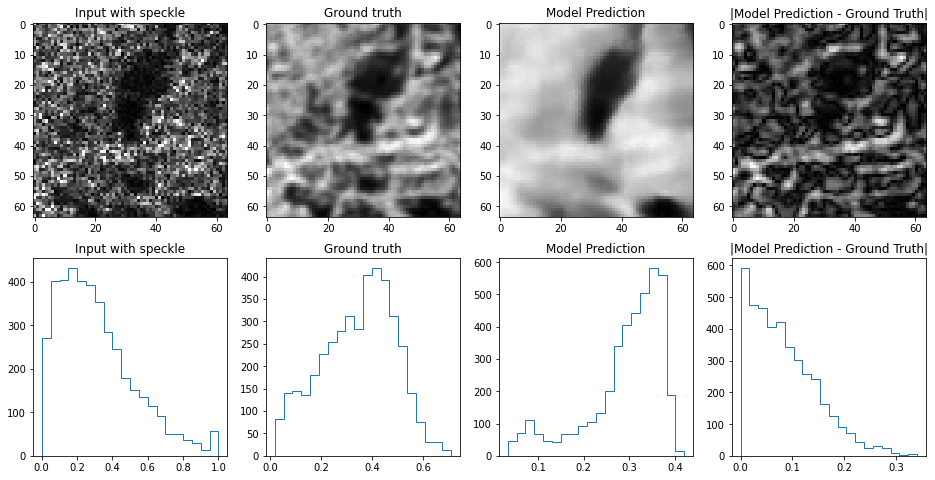

-------------------------------------------------------------------------------------------
Test 23


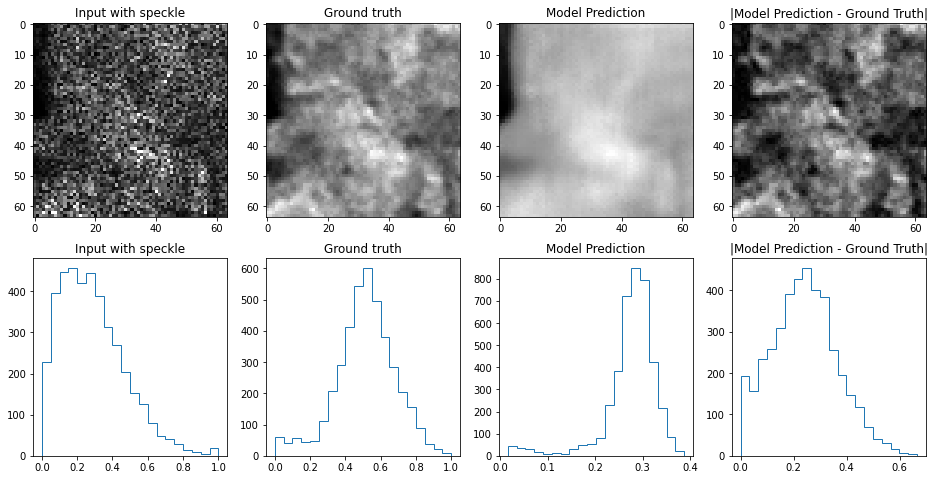

-------------------------------------------------------------------------------------------
Test 24


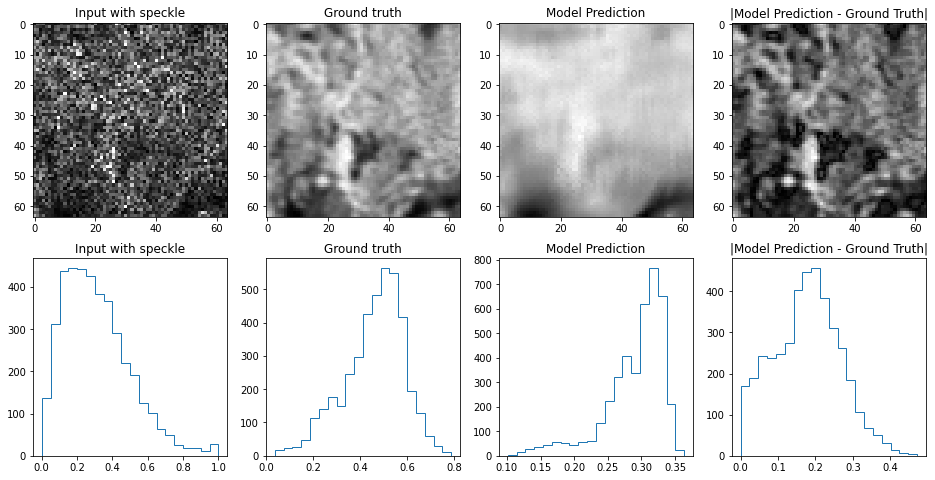

-------------------------------------------------------------------------------------------
Test 25


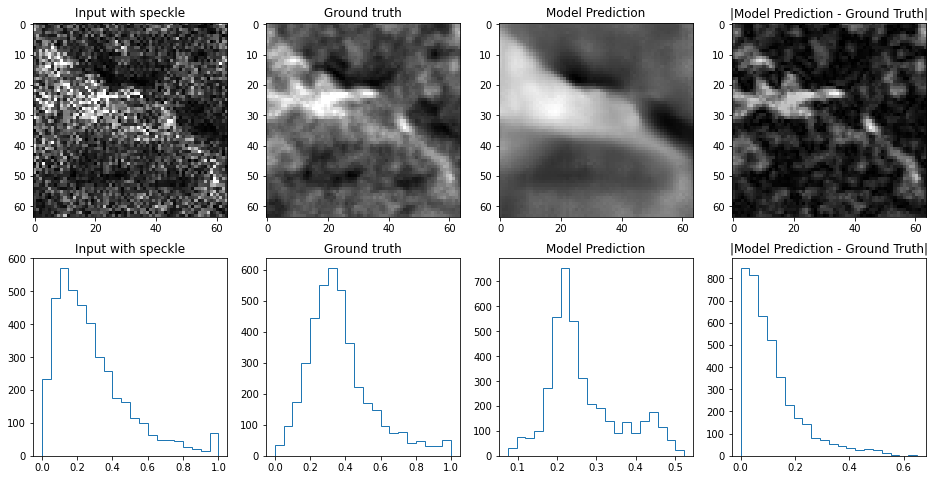

-------------------------------------------------------------------------------------------
Test 26


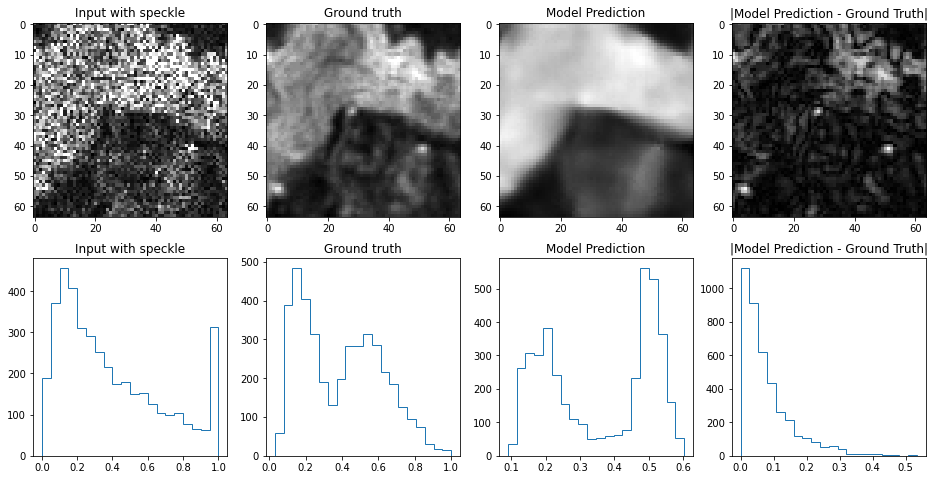

-------------------------------------------------------------------------------------------
Test 27


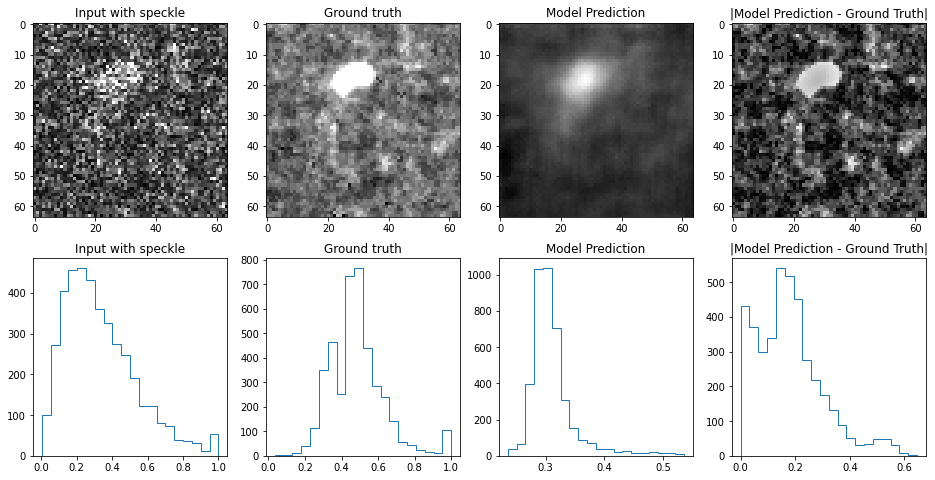

-------------------------------------------------------------------------------------------
Test 28


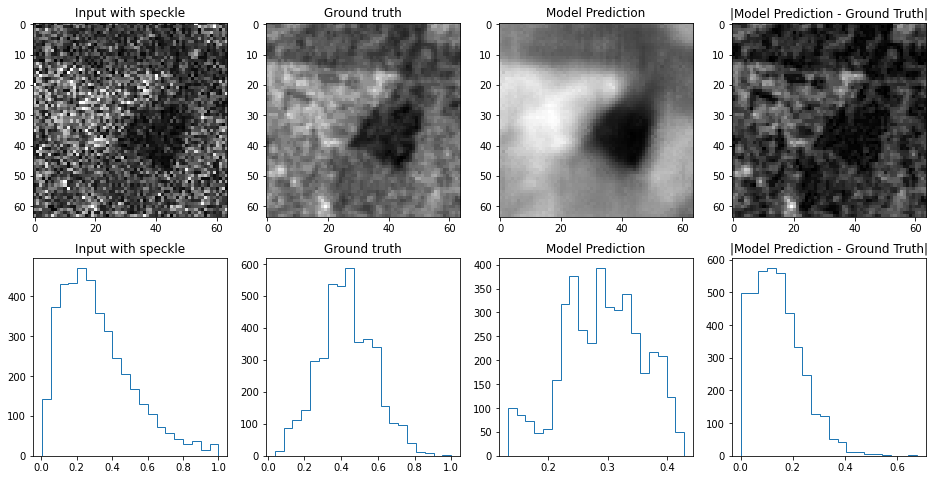

-------------------------------------------------------------------------------------------
Test 29


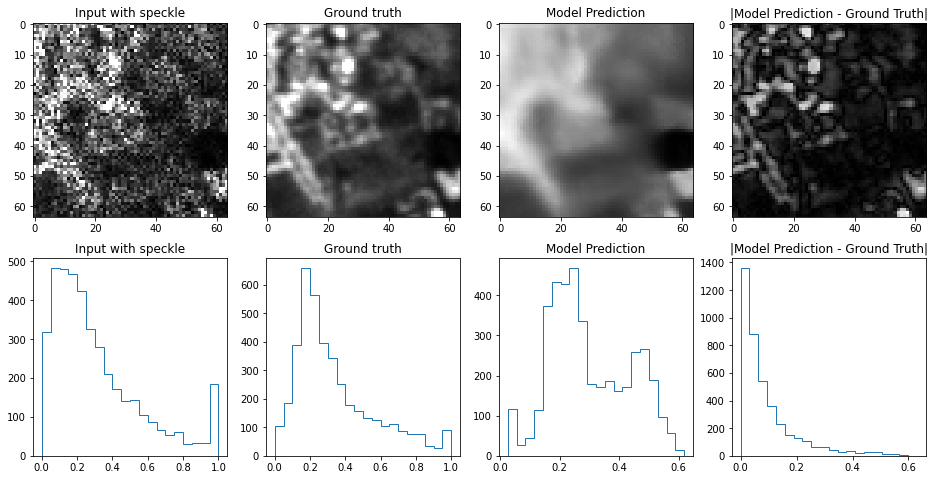

-------------------------------------------------------------------------------------------
Test 30


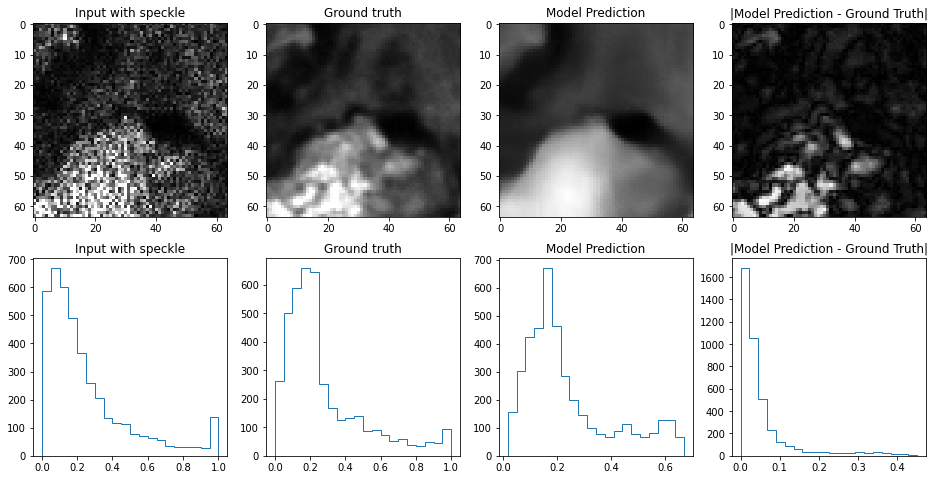

-------------------------------------------------------------------------------------------
Test 31


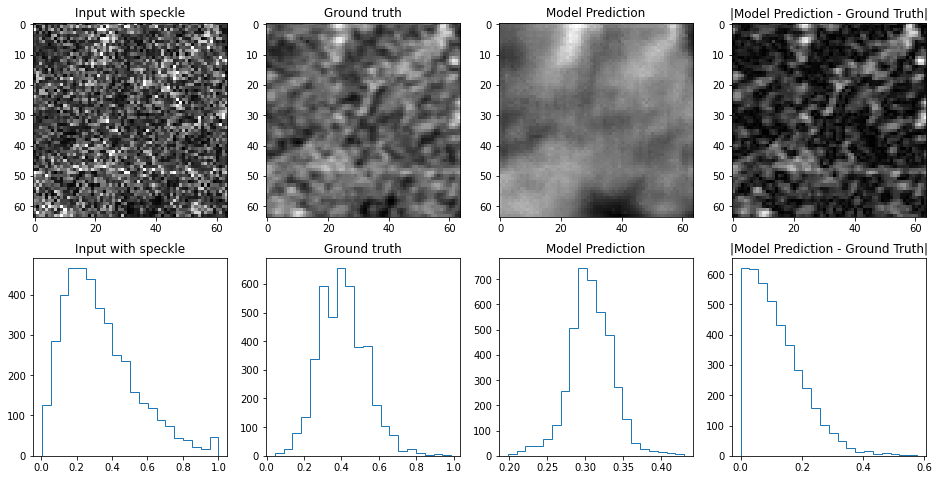

-------------------------------------------------------------------------------------------
Test 32


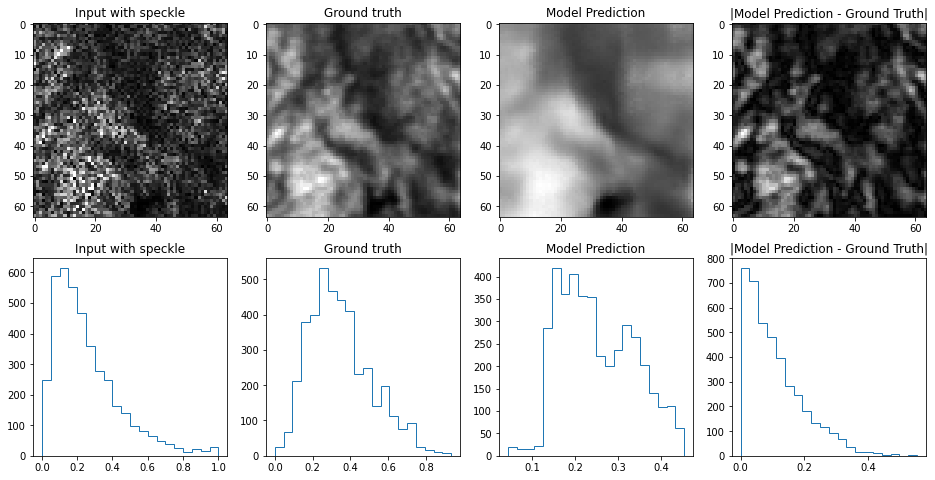

-------------------------------------------------------------------------------------------
Test 33


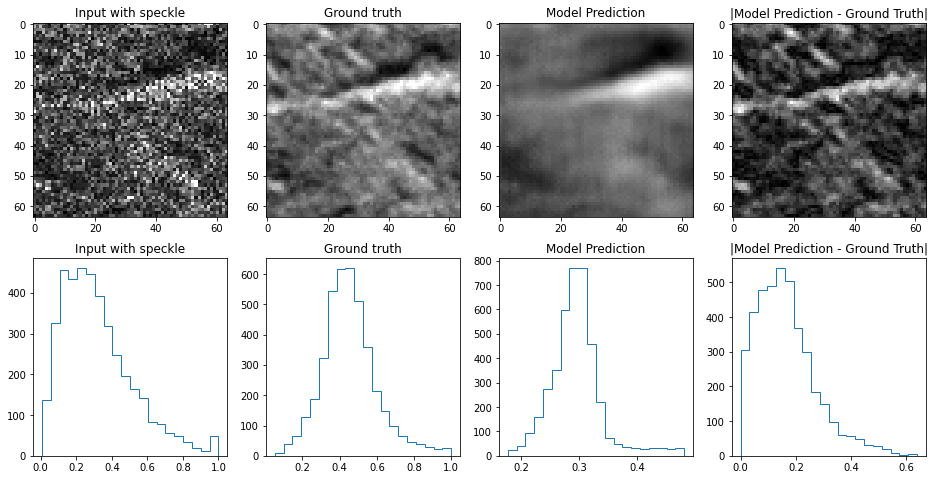

-------------------------------------------------------------------------------------------
Test 34


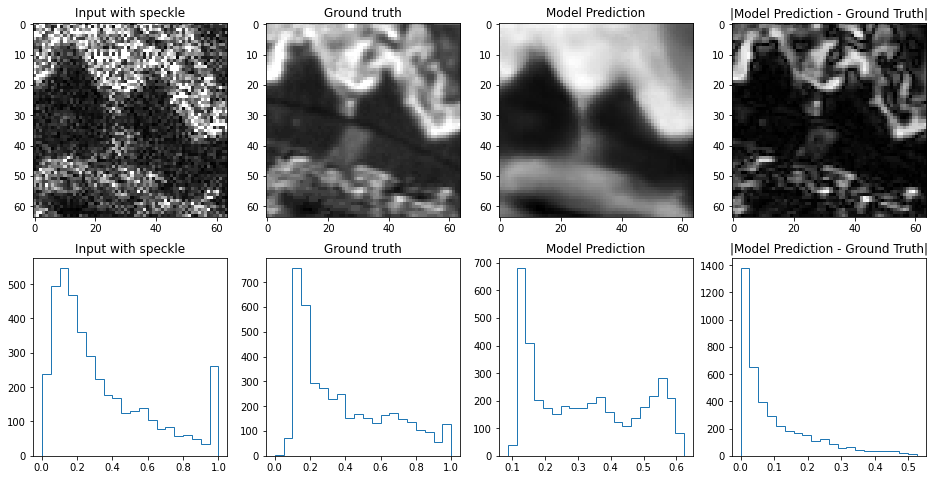

-------------------------------------------------------------------------------------------
Test 35


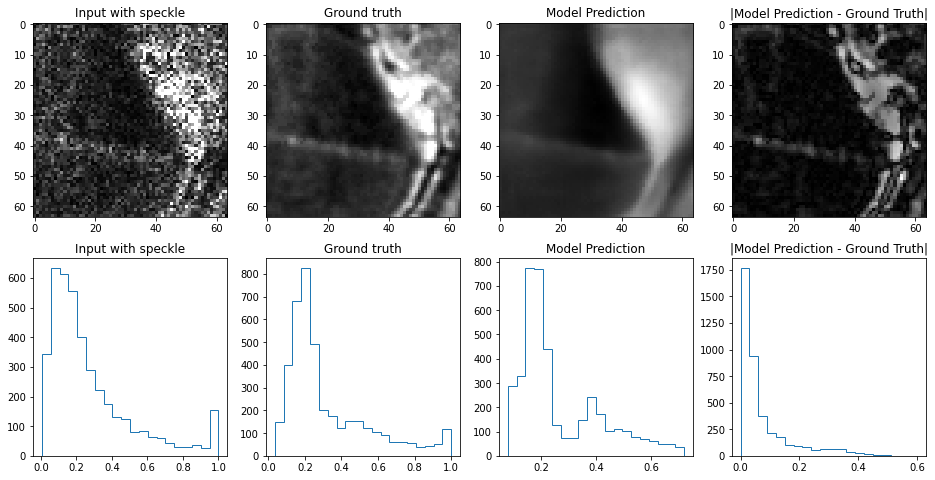

-------------------------------------------------------------------------------------------
Test 36


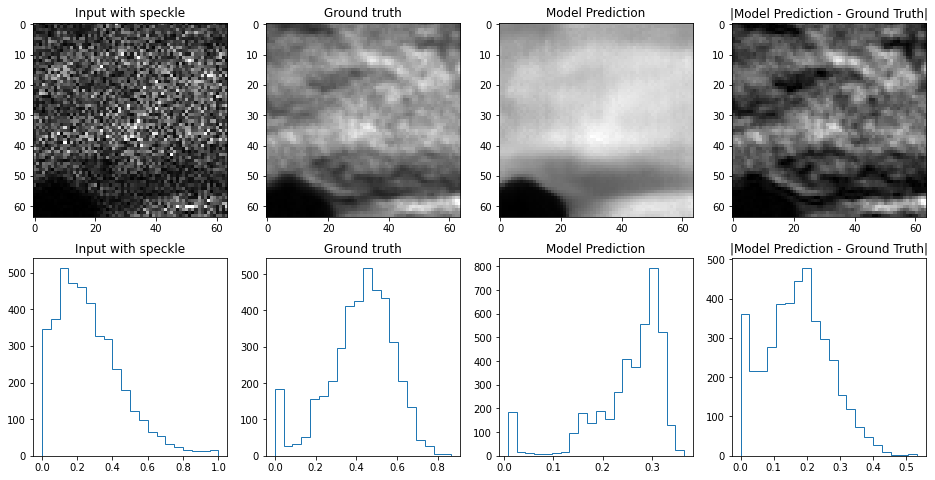

-------------------------------------------------------------------------------------------
Test 37


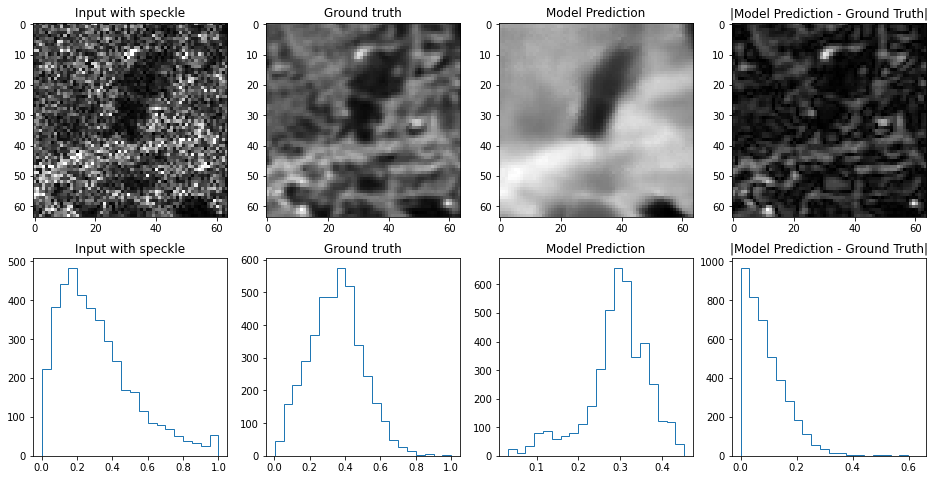

-------------------------------------------------------------------------------------------
Test 38


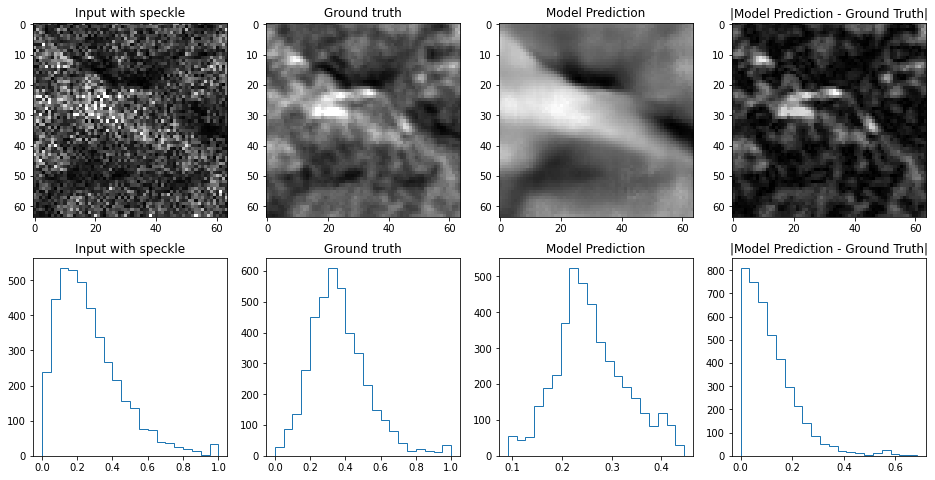

-------------------------------------------------------------------------------------------
Test 39


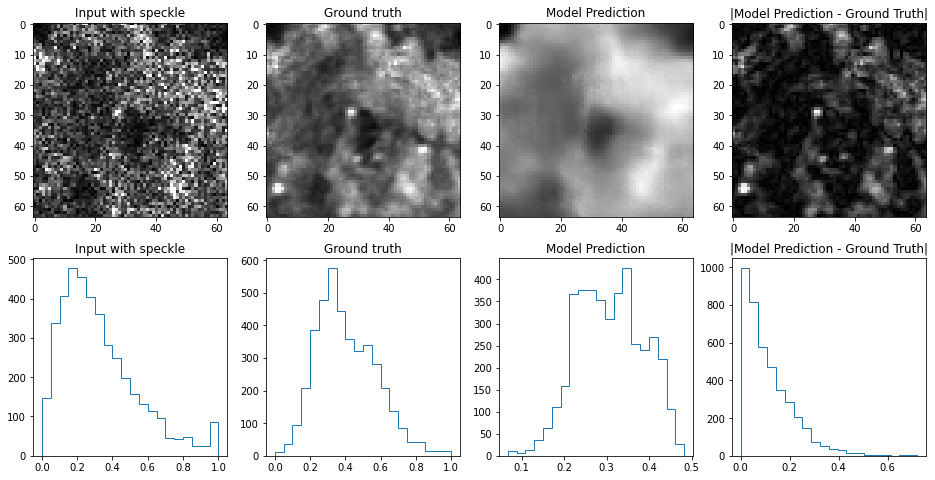

-------------------------------------------------------------------------------------------
Test 40


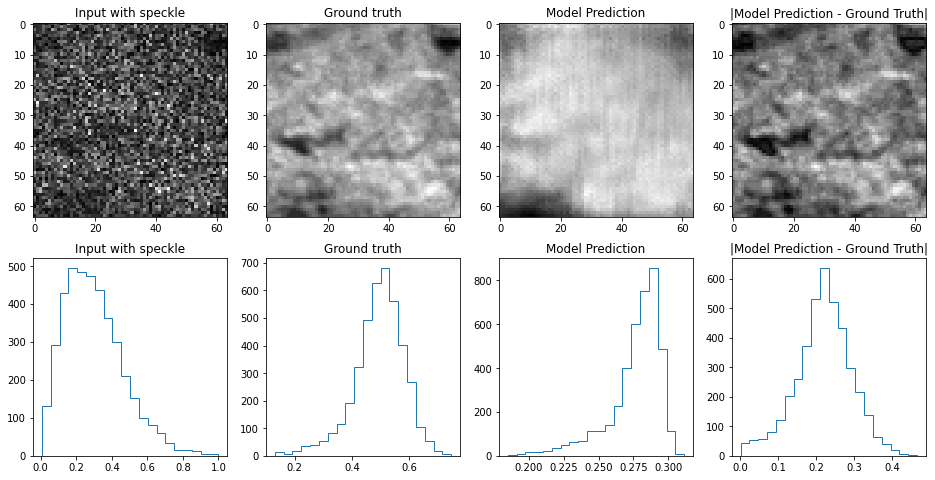

-------------------------------------------------------------------------------------------
Test 41


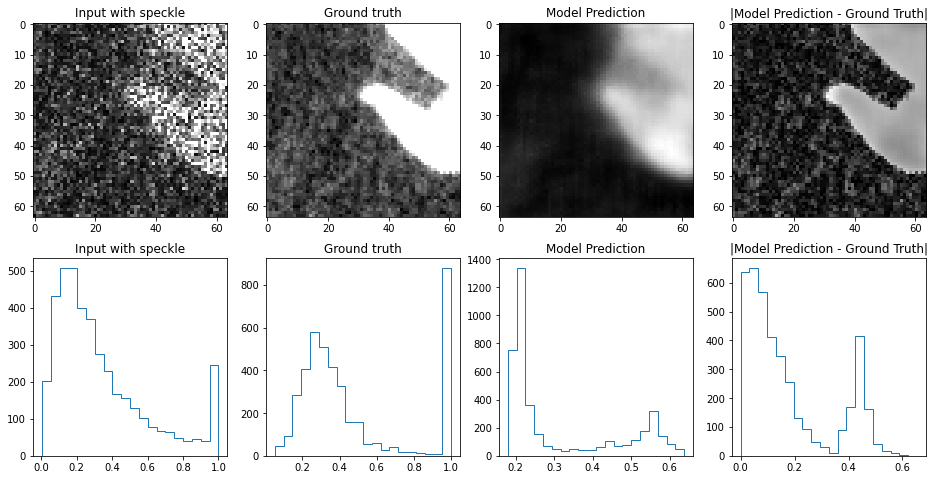

-------------------------------------------------------------------------------------------
Test 42


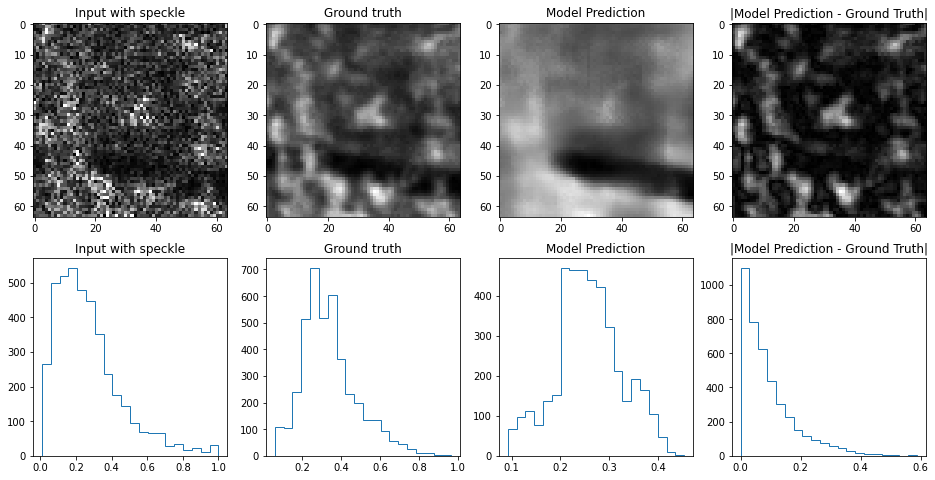

-------------------------------------------------------------------------------------------
Test 43


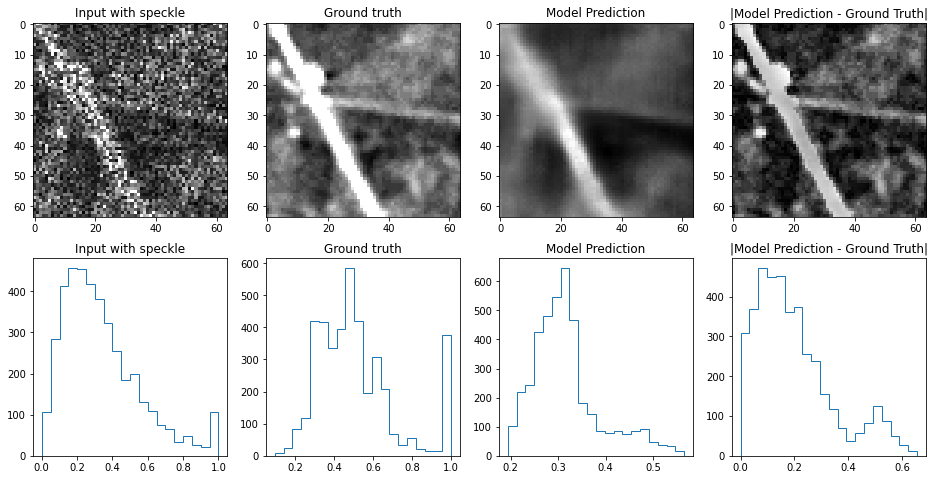

-------------------------------------------------------------------------------------------
Test 44


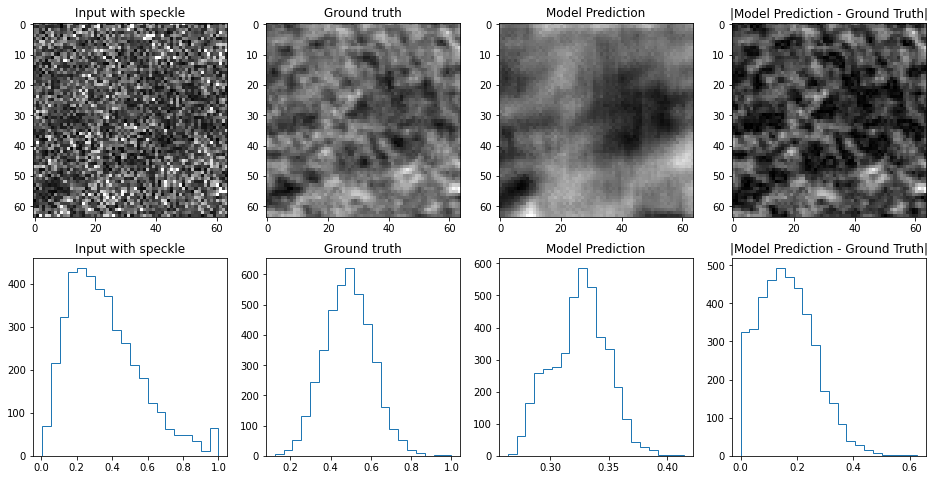

-------------------------------------------------------------------------------------------
Test 45


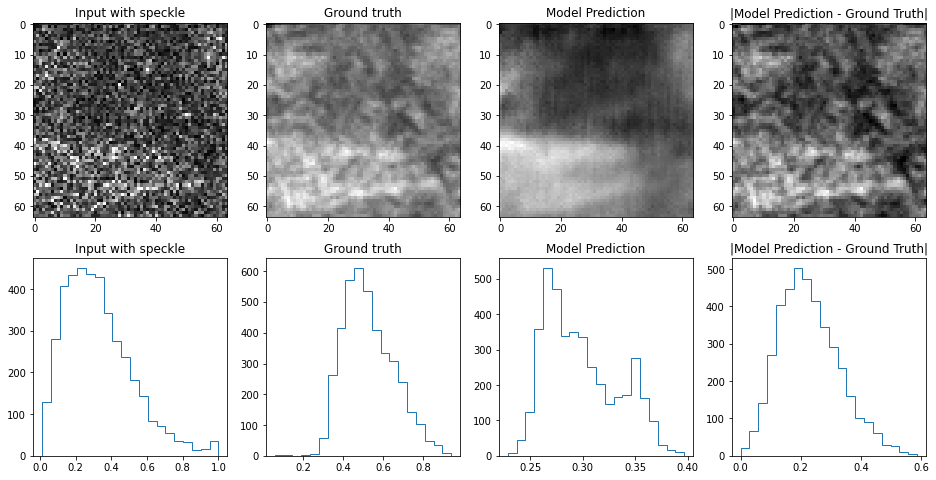

-------------------------------------------------------------------------------------------
Test 46


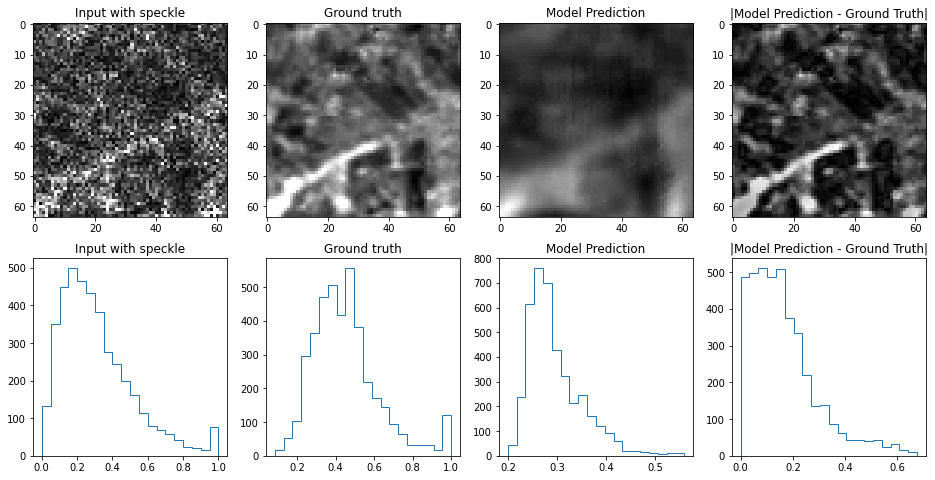

-------------------------------------------------------------------------------------------
Test 47


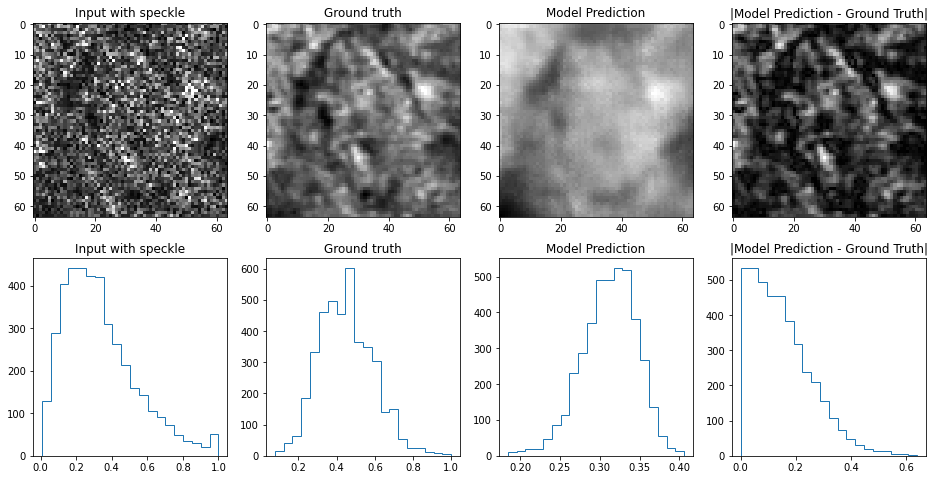

-------------------------------------------------------------------------------------------
Test 48


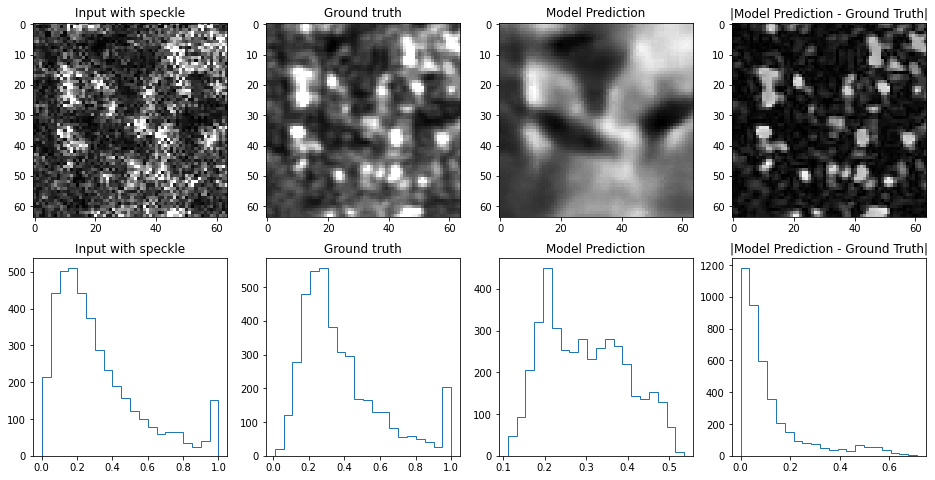

-------------------------------------------------------------------------------------------
Test 49


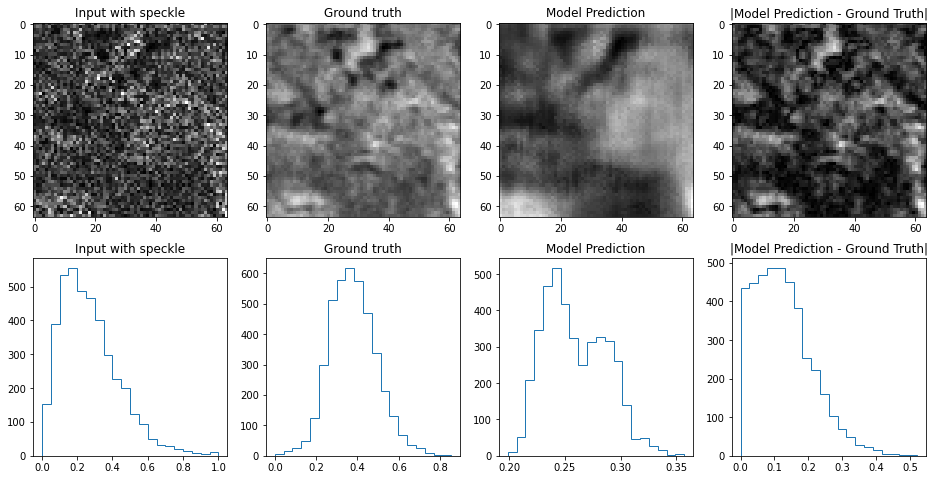

-------------------------------------------------------------------------------------------
Test 50


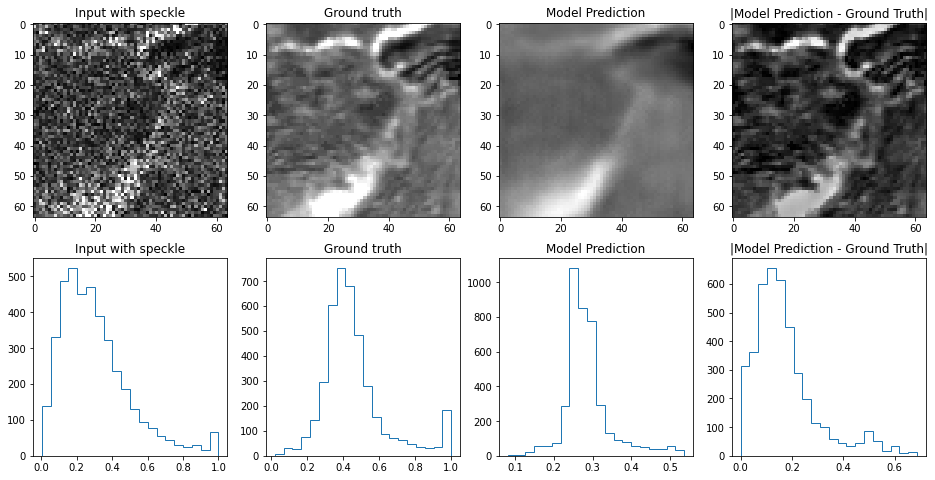

-------------------------------------------------------------------------------------------
Test 51


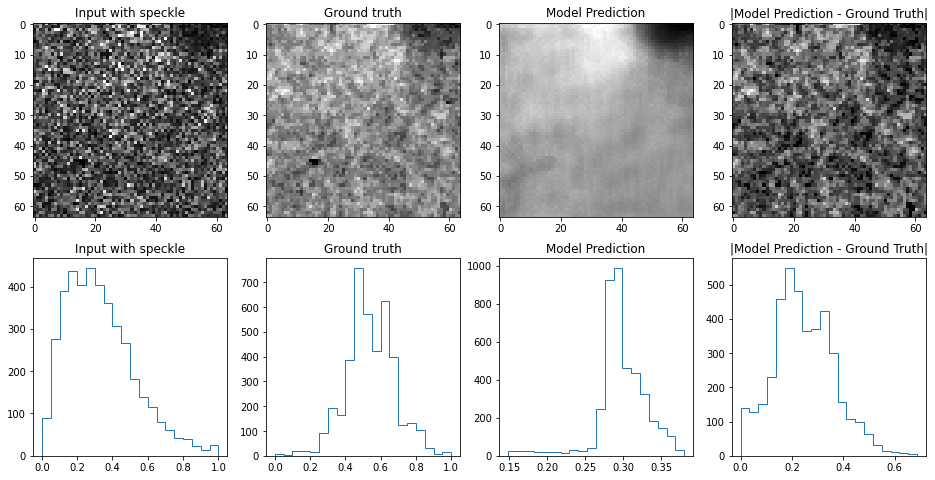

-------------------------------------------------------------------------------------------
Test 52


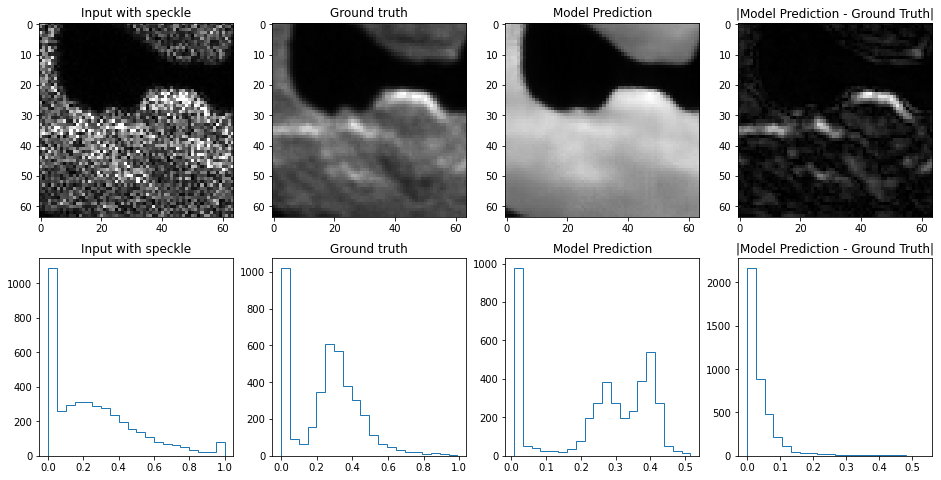

-------------------------------------------------------------------------------------------
Test 53


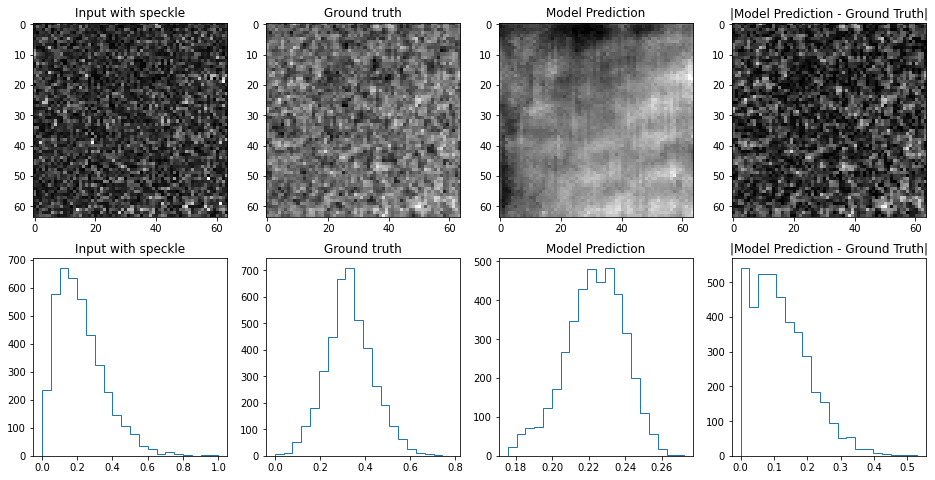

In [14]:
plot_model_results(batch_speckle[:,:64,:64,...], batch_clean[:,:64,:64,...], batch_pred[:,:64,:64,...])

In [15]:
compute_metrics(batch_speckle[:,:64,:64,...], batch_clean[:,:64,:64,...], batch_pred[:,:64,:64,...])

  Test 		 Metric		Grount Truth VS Grount Truth 		 Grount Truth VS Input 		 Grount Truth VS Model Prediction
-------------------------------------------------------------------------------------------------------------------------------------------
   0  		  PSNR 		             inf             		             12.63      		             13.79
   0  		  PSNR 		             1.00             		             0.15      		             0.31
-------------------------------------------------------------------------------------------------------------------------------------------
   1  		  PSNR 		             inf             		             12.29      		             12.99
   1  		  PSNR 		             1.00             		             0.41      		             0.29
-------------------------------------------------------------------------------------------------------------------------------------------
   2  		  PSNR 		             inf             		             16.98      		             20.12
   2  		 

/Users/alessandrosebastianelli/Desktop/CNNSpeckleFilter/filterenv/lib/python3.6/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


# SAR2SAR

In [7]:
IMG_SHAPE = (256,256,1)

In [8]:
batch_speckle, batch_clean = handler.data_loader_v2(
    paths      = handler.test_paths, 
    img_shape  = IMG_SHAPE)

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from model import denoiser


with tf.Session() as sess:
    model = denoiser(sess)
    model.load('SAR2SAR-GRD-test/checkpoint')
    Y_ = tf.placeholder(tf.float32, [None, None, None, 1],
                                 name='clean_image')
    pred = sess.run([model.Y], feed_dict={model.Y_: batch_speckle})

Instructions for updating:
non-resource variables are not supported in the long term


/Users/alessandrosebastianelli/Desktop/CNNSpeckleFilter/filterenv/lib/python3.6/site-packages/tensorflow/python/keras/legacy_tf_layers/convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
/Users/alessandrosebastianelli/Desktop/CNNSpeckleFilter/filterenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


[*] Initialize model successfully...
[*] Reading checkpoint...
INFO:tensorflow:Restoring parameters from SAR2SAR-GRD-test/checkpoint/SAR2SAR-tensorflow-101940


-------------------------------------------------------------------------------------------
Test 0


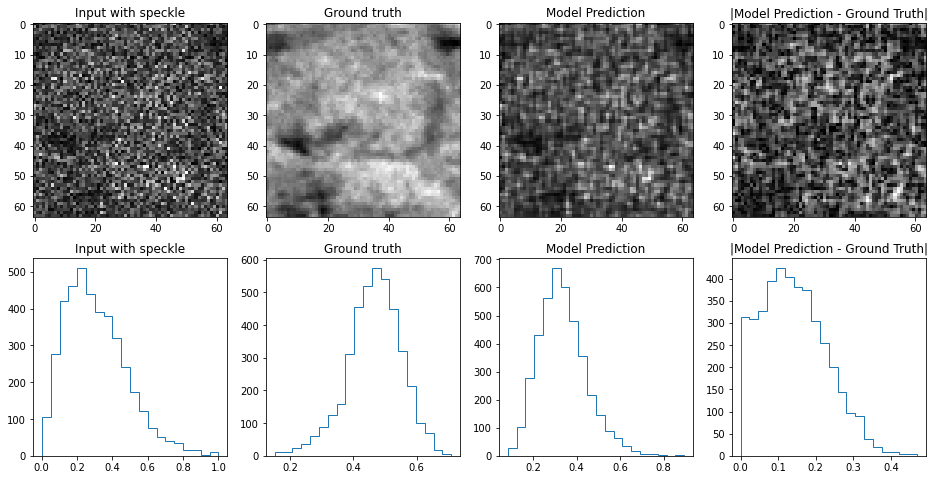

-------------------------------------------------------------------------------------------
Test 1


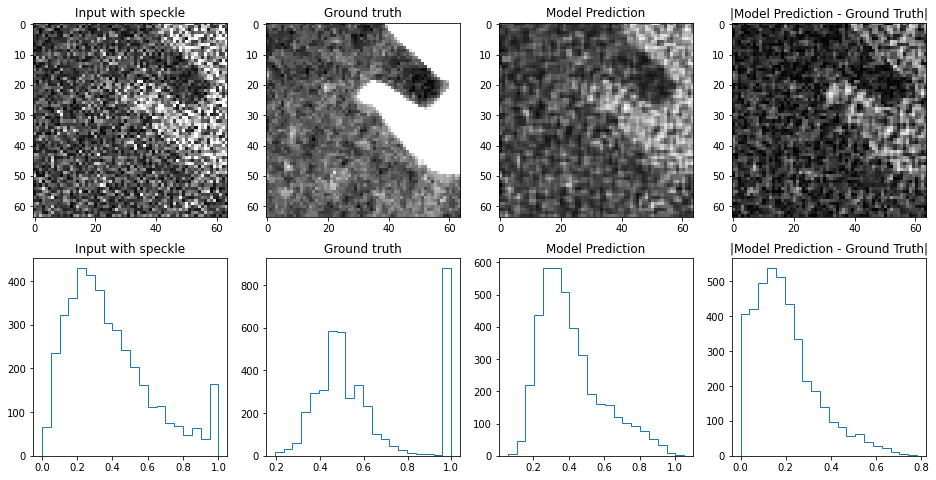

-------------------------------------------------------------------------------------------
Test 2


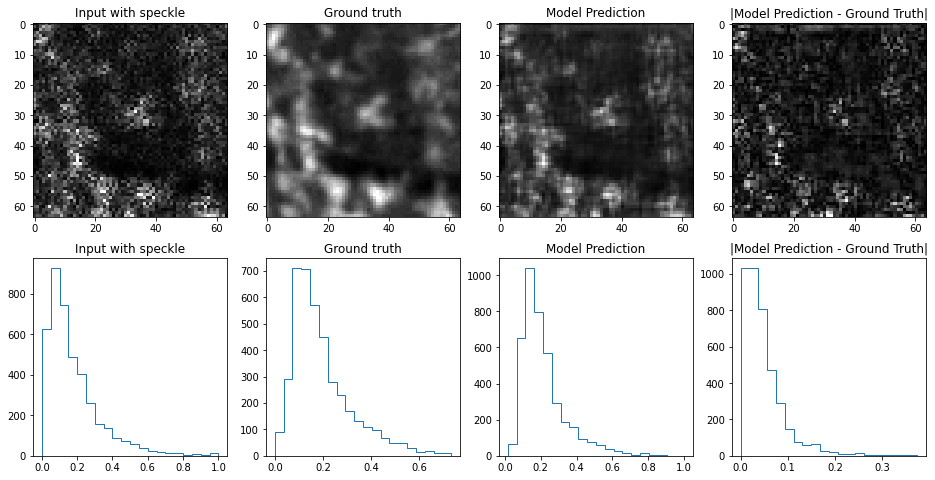

-------------------------------------------------------------------------------------------
Test 3


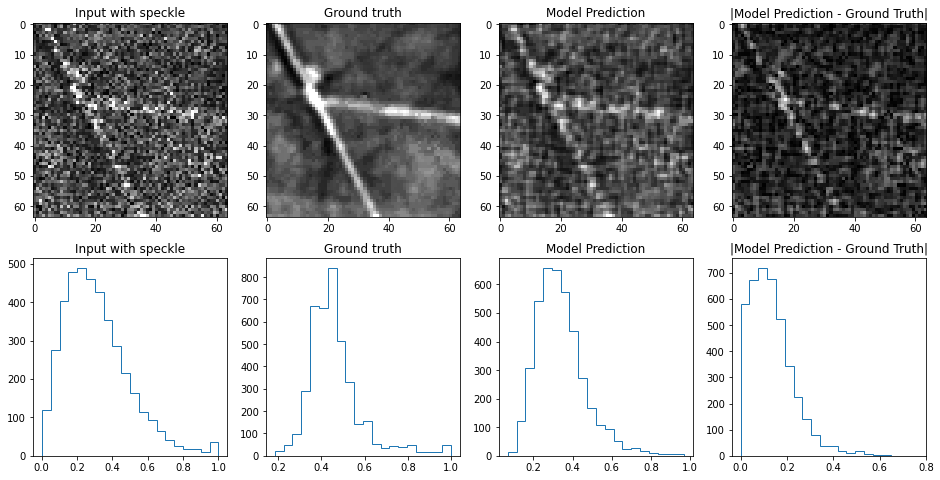

-------------------------------------------------------------------------------------------
Test 4


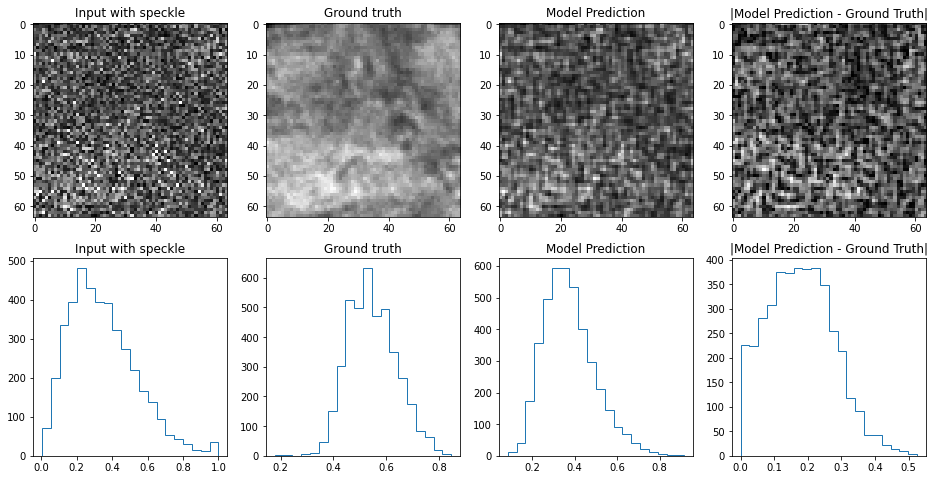

-------------------------------------------------------------------------------------------
Test 5


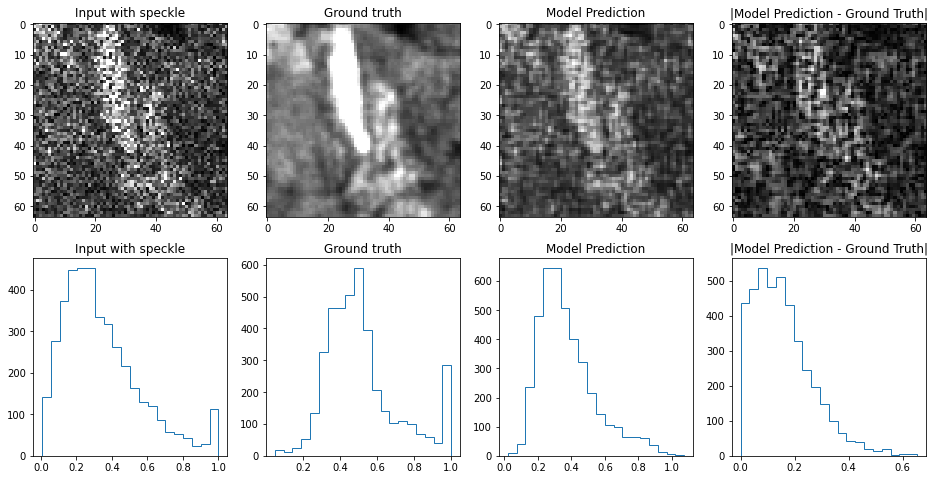

-------------------------------------------------------------------------------------------
Test 6


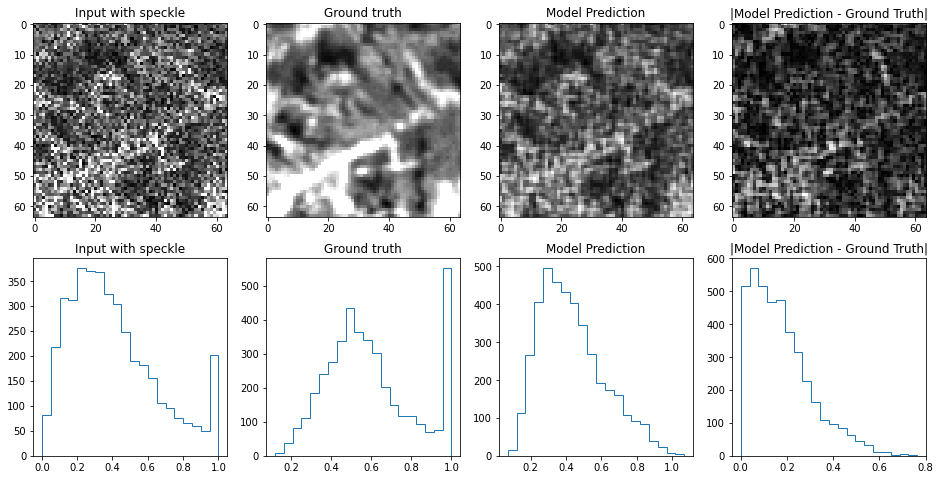

-------------------------------------------------------------------------------------------
Test 7


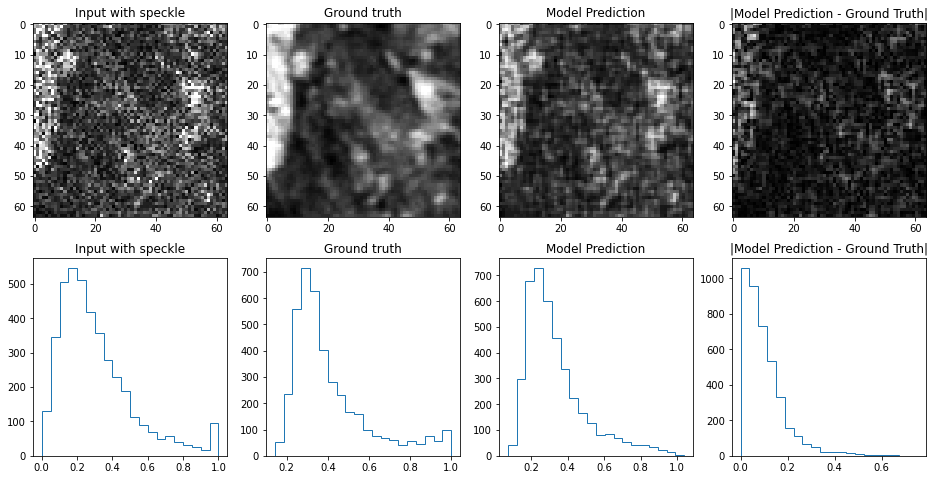

-------------------------------------------------------------------------------------------
Test 8


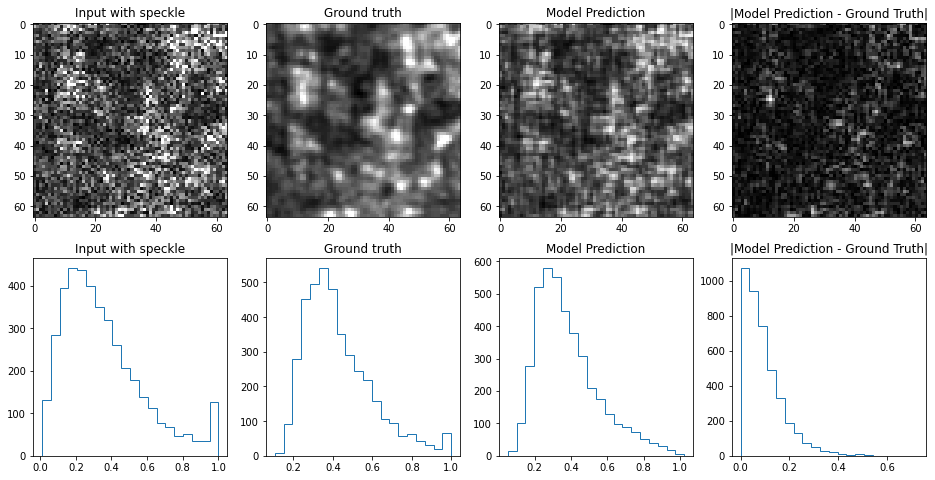

-------------------------------------------------------------------------------------------
Test 9


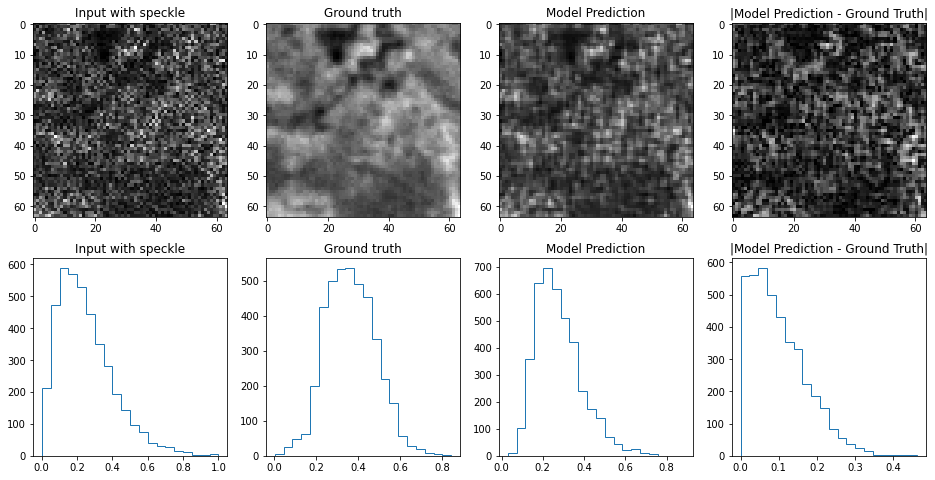

-------------------------------------------------------------------------------------------
Test 10


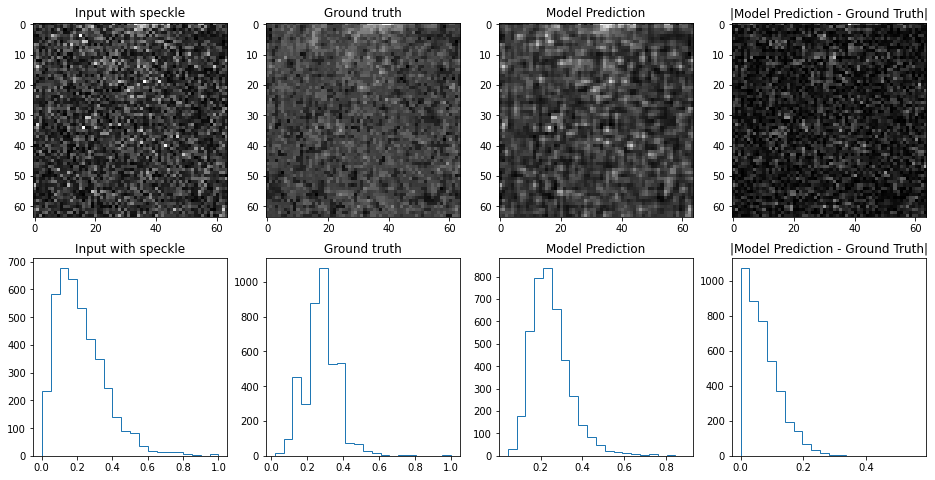

-------------------------------------------------------------------------------------------
Test 11


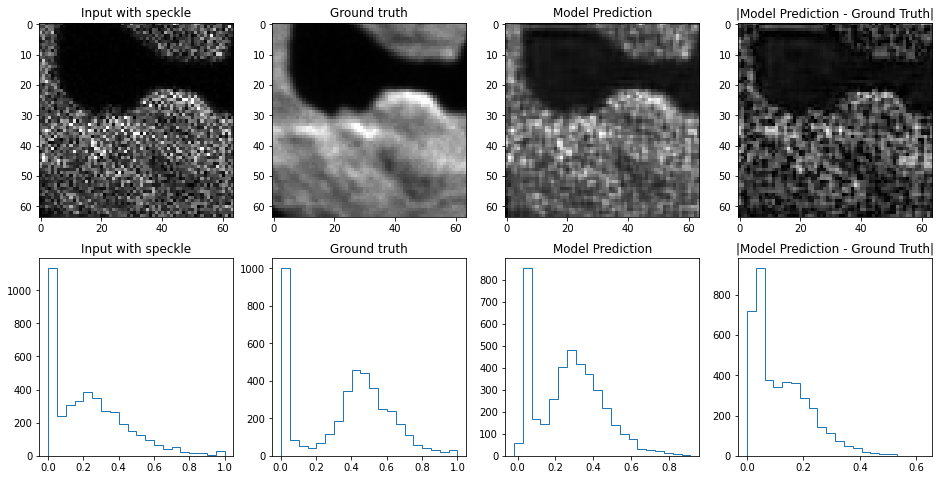

-------------------------------------------------------------------------------------------
Test 12


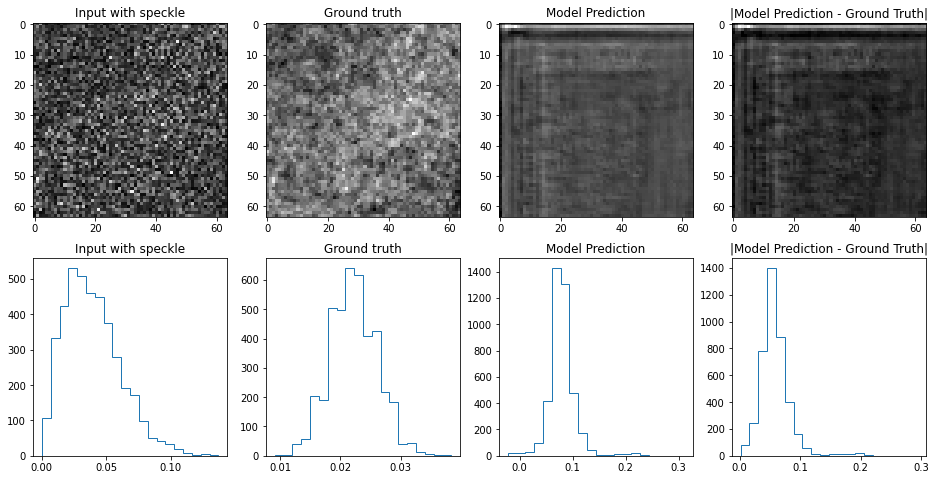

-------------------------------------------------------------------------------------------
Test 13


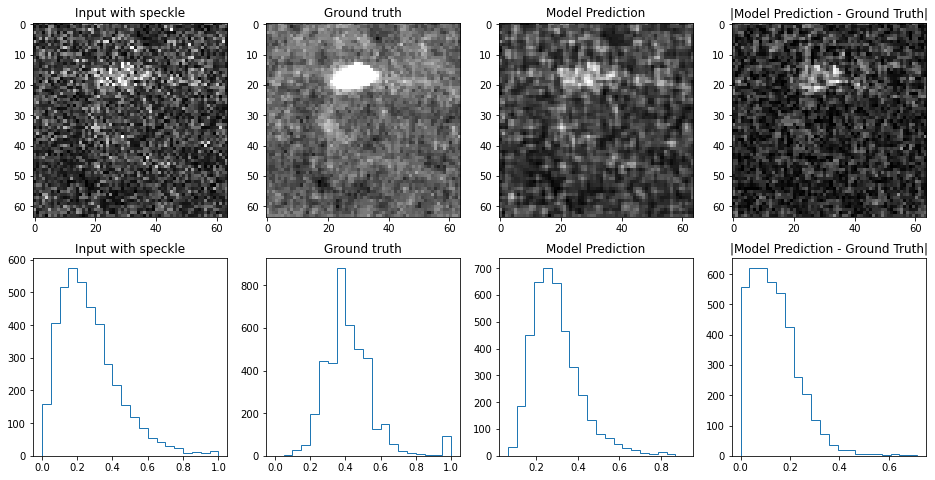

-------------------------------------------------------------------------------------------
Test 14


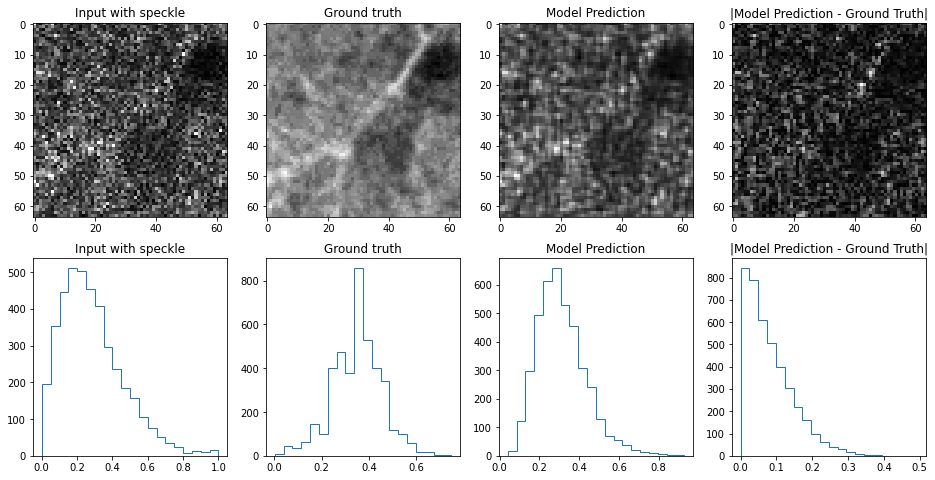

-------------------------------------------------------------------------------------------
Test 15


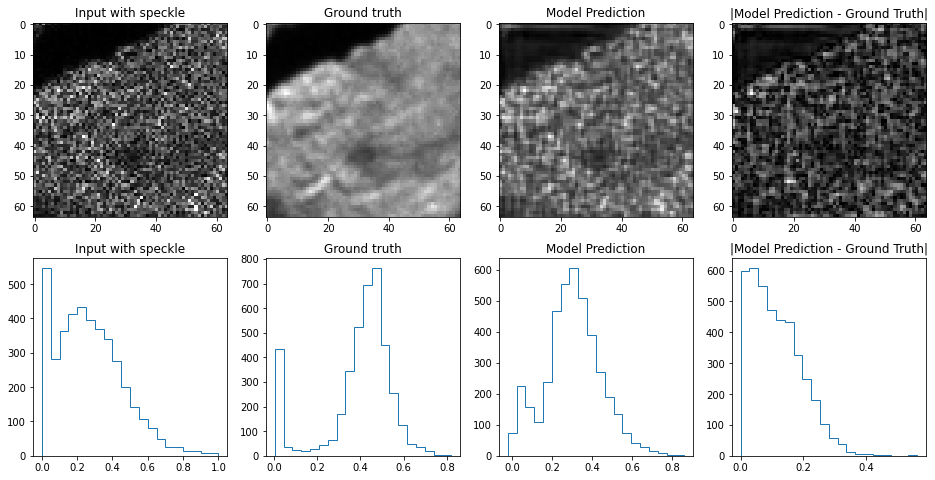

-------------------------------------------------------------------------------------------
Test 16


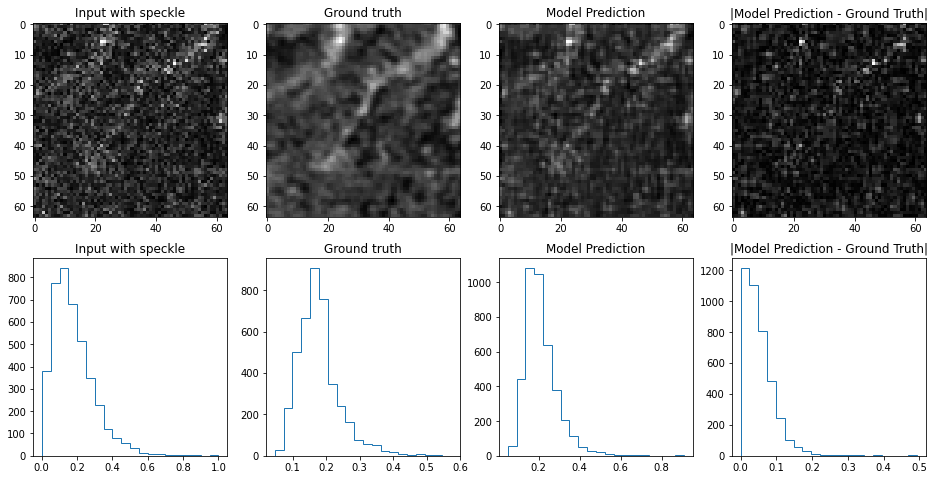

-------------------------------------------------------------------------------------------
Test 17


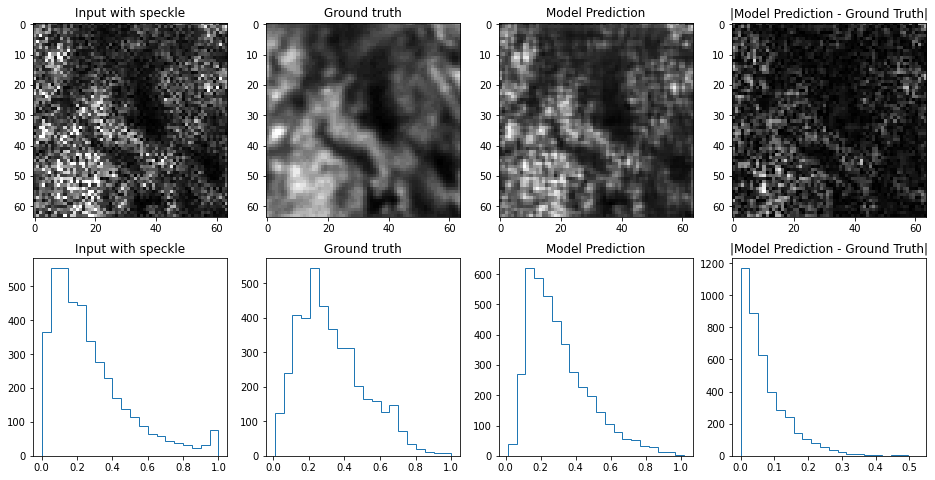

-------------------------------------------------------------------------------------------
Test 18


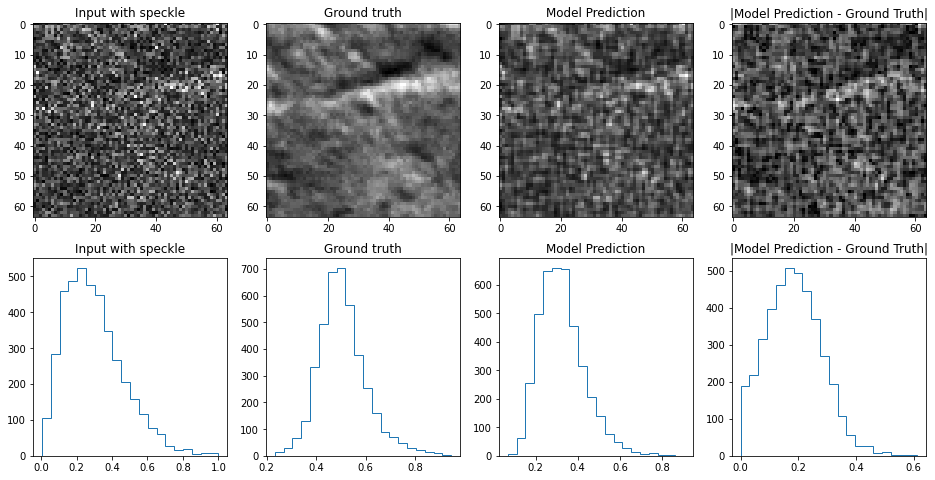

-------------------------------------------------------------------------------------------
Test 19


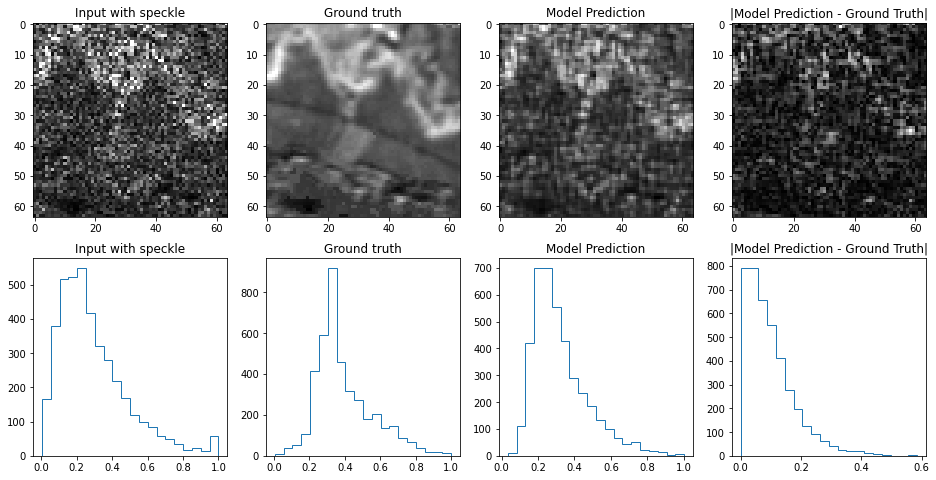

-------------------------------------------------------------------------------------------
Test 20


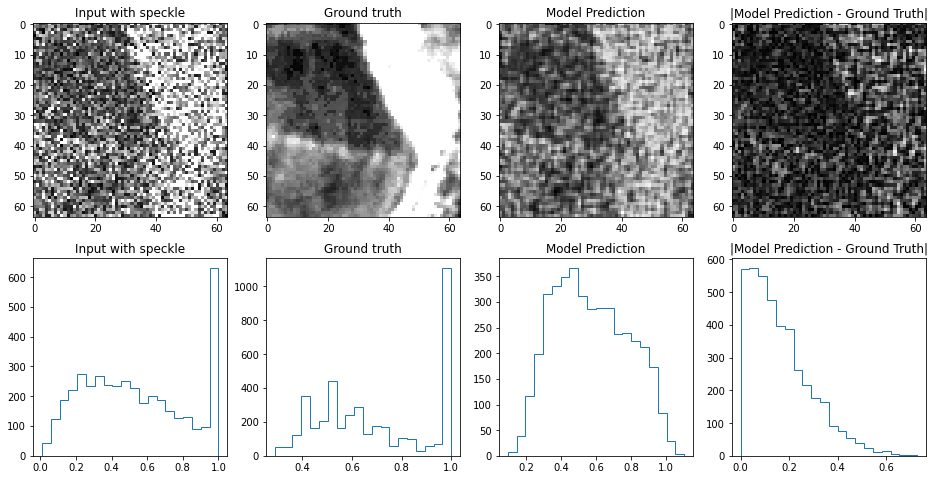

-------------------------------------------------------------------------------------------
Test 21


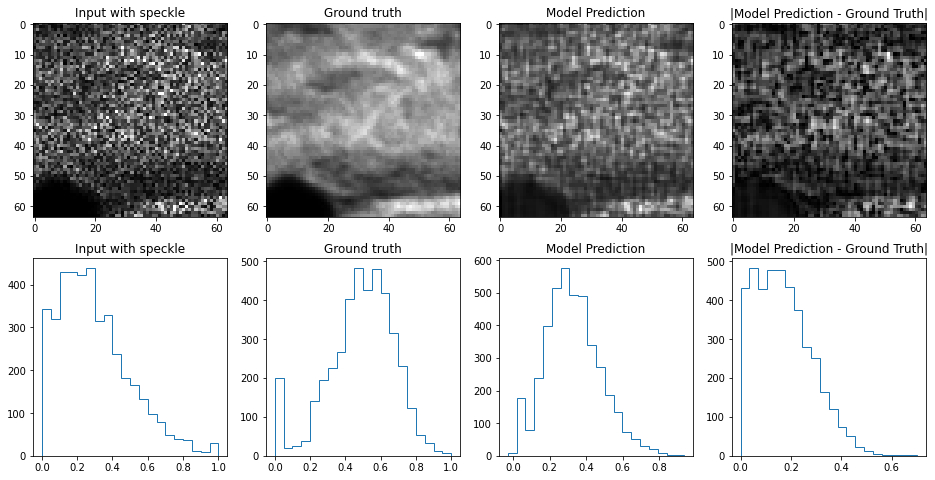

-------------------------------------------------------------------------------------------
Test 22


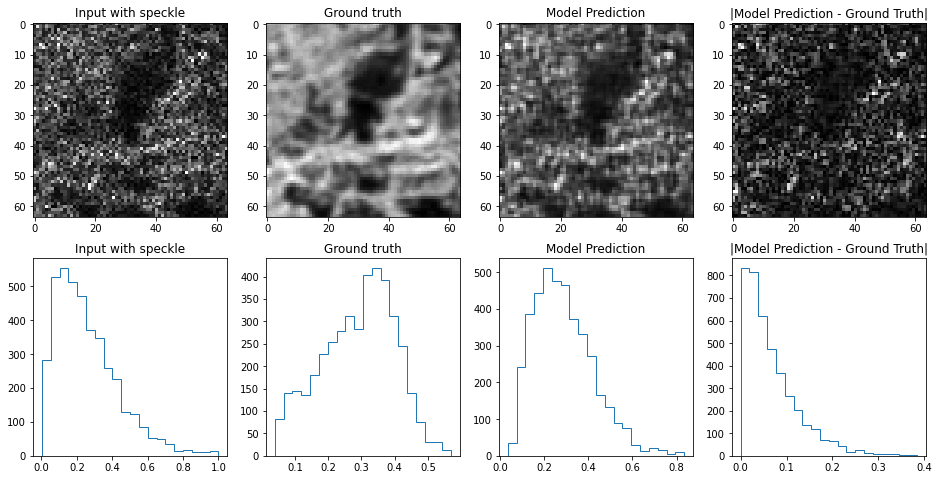

-------------------------------------------------------------------------------------------
Test 23


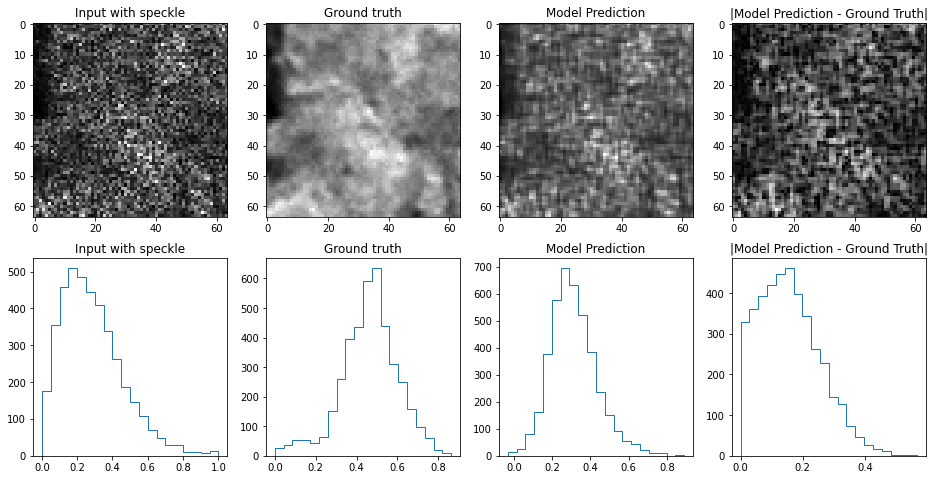

-------------------------------------------------------------------------------------------
Test 24


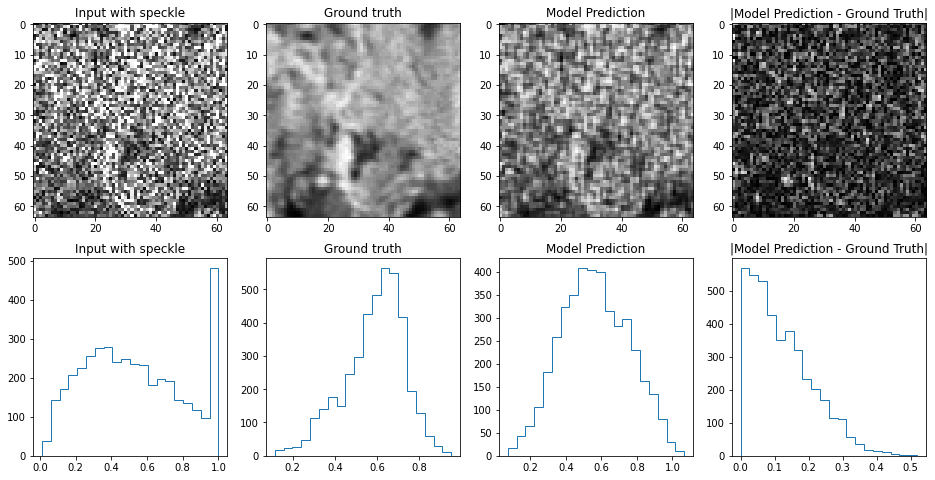

-------------------------------------------------------------------------------------------
Test 25


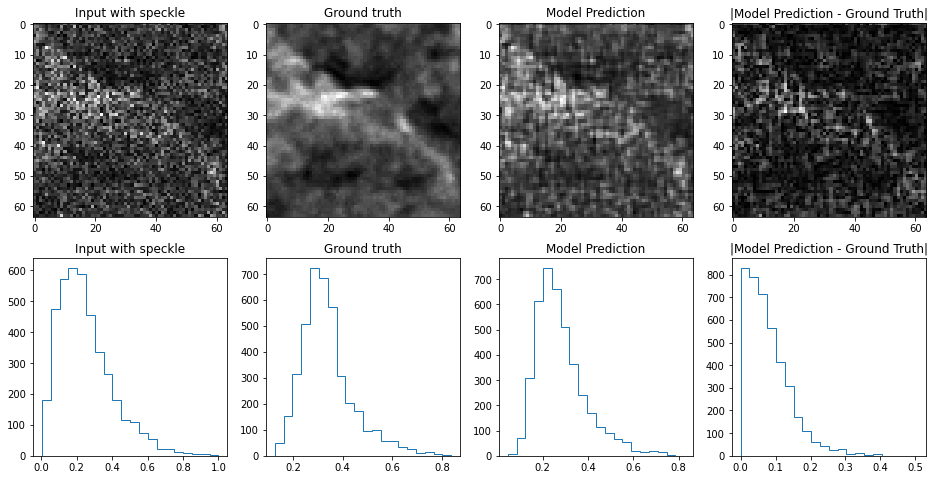

-------------------------------------------------------------------------------------------
Test 26


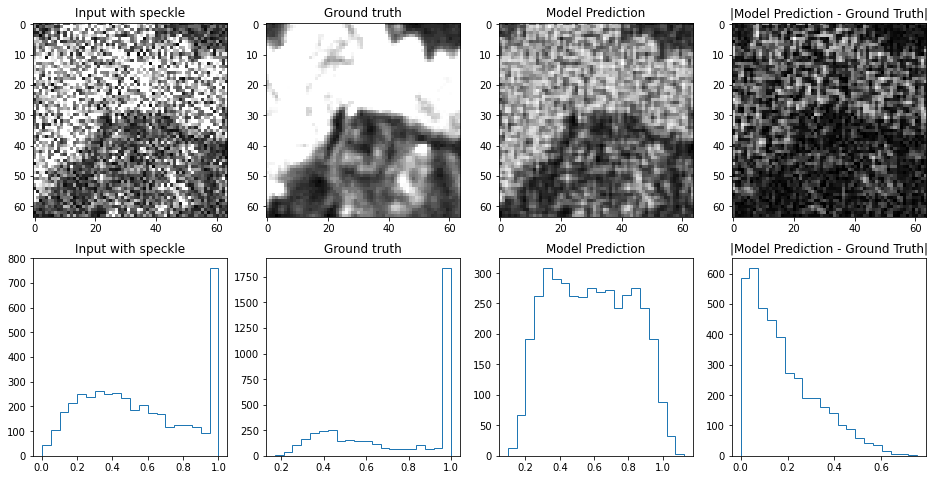

-------------------------------------------------------------------------------------------
Test 27


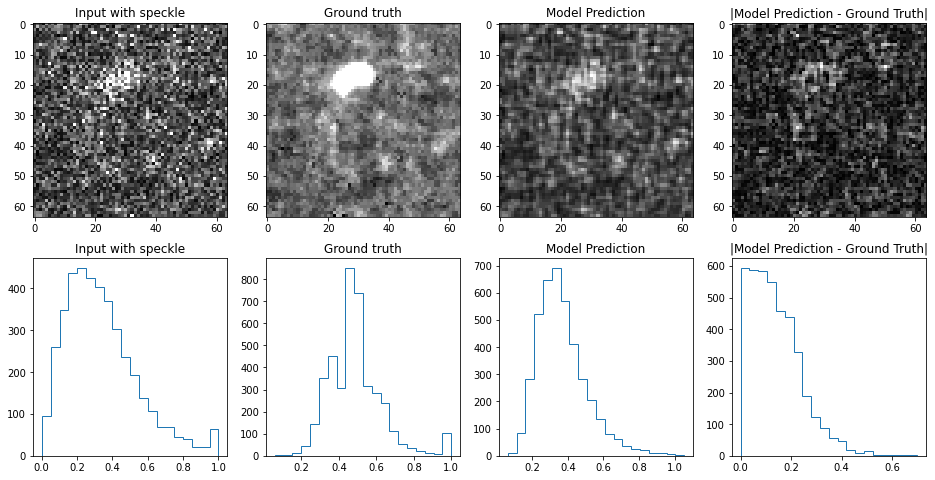

-------------------------------------------------------------------------------------------
Test 28


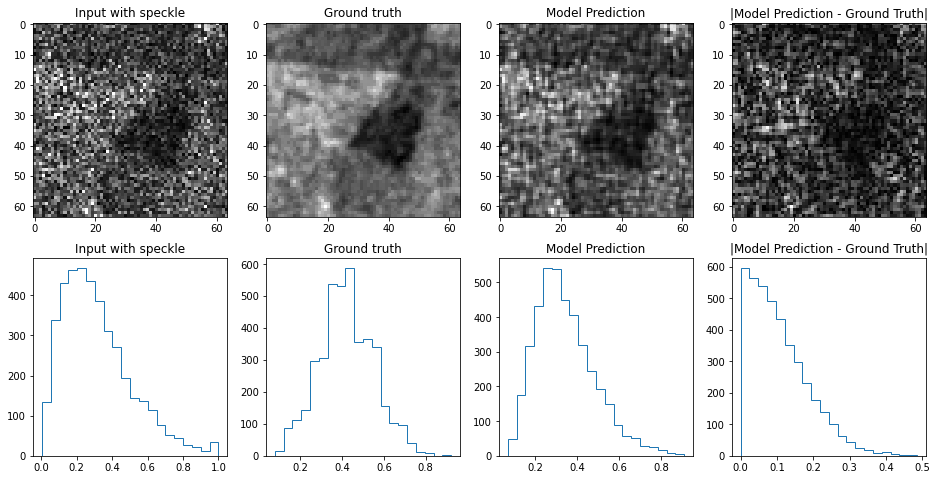

-------------------------------------------------------------------------------------------
Test 29


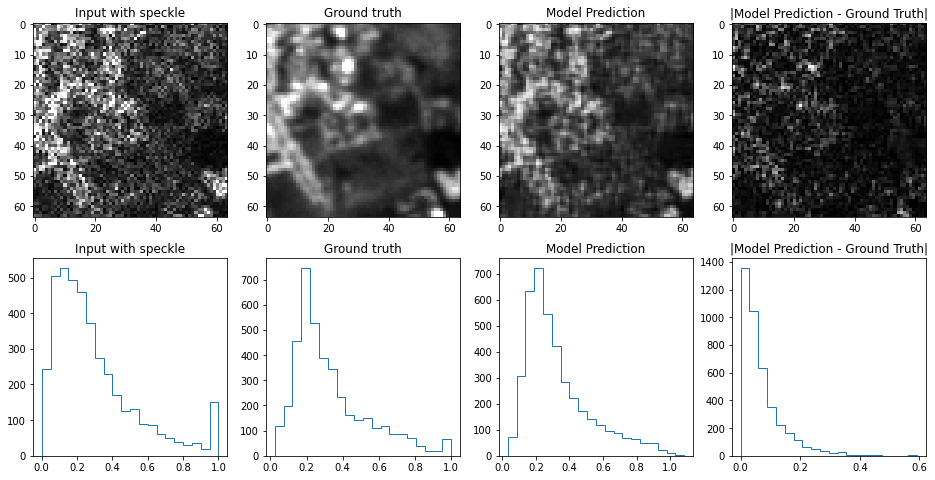

-------------------------------------------------------------------------------------------
Test 30


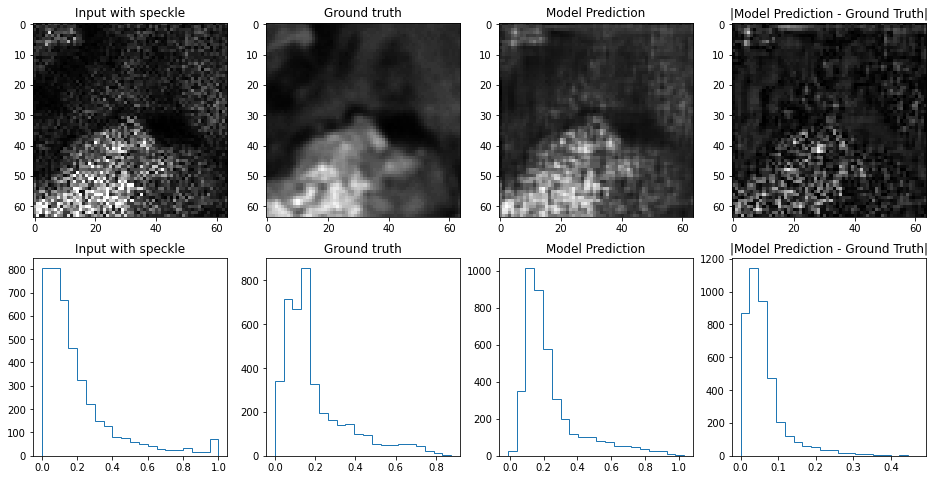

-------------------------------------------------------------------------------------------
Test 31


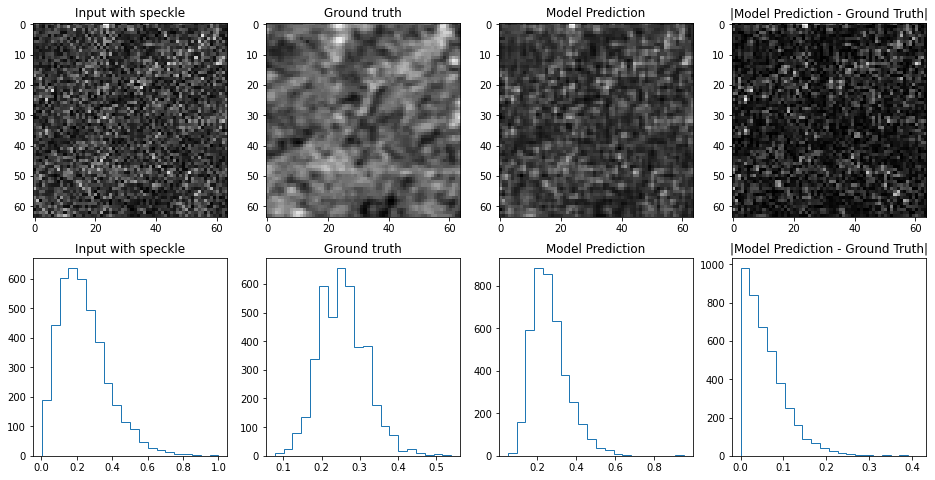

-------------------------------------------------------------------------------------------
Test 32


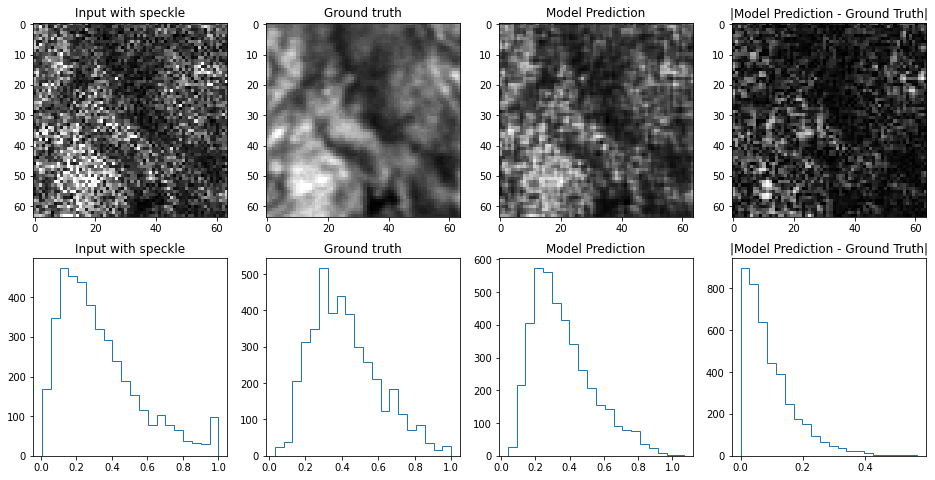

-------------------------------------------------------------------------------------------
Test 33


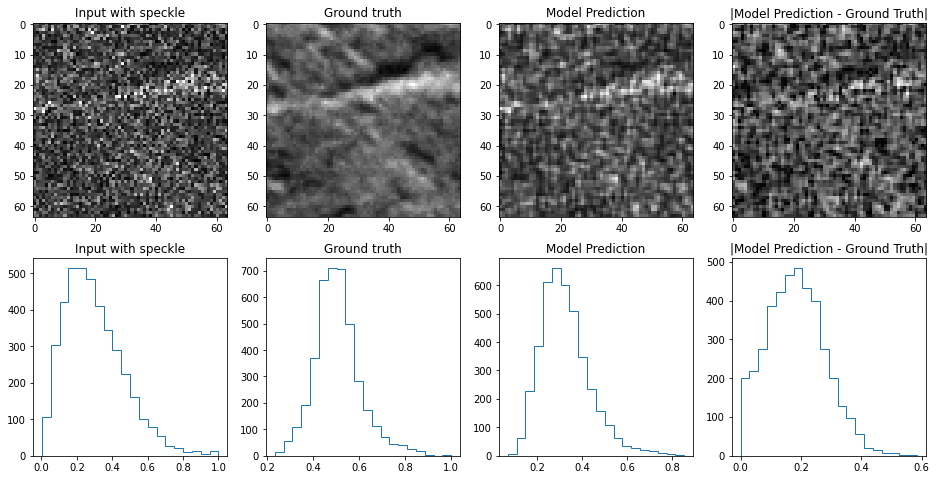

-------------------------------------------------------------------------------------------
Test 34


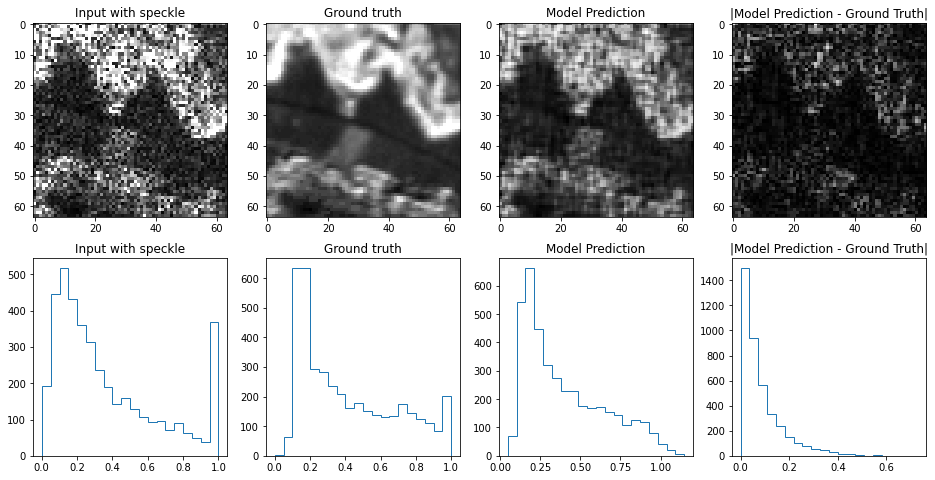

-------------------------------------------------------------------------------------------
Test 35


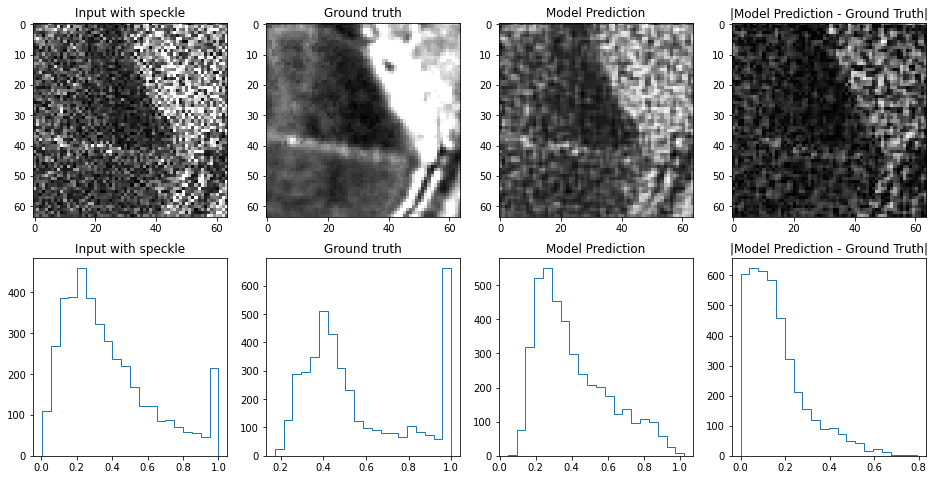

-------------------------------------------------------------------------------------------
Test 36


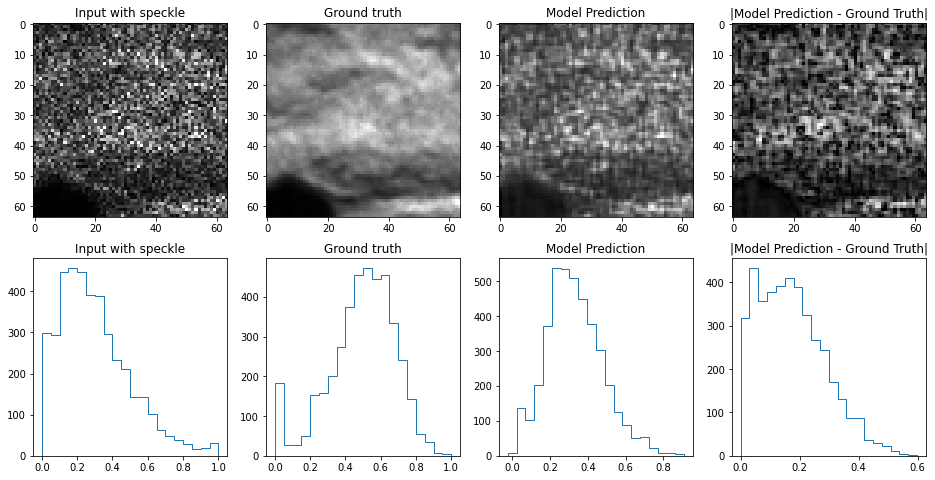

-------------------------------------------------------------------------------------------
Test 37


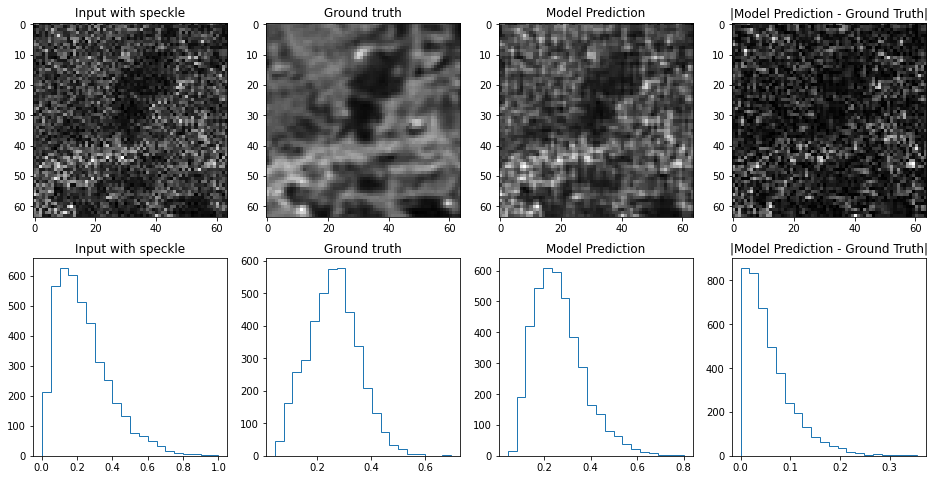

-------------------------------------------------------------------------------------------
Test 38


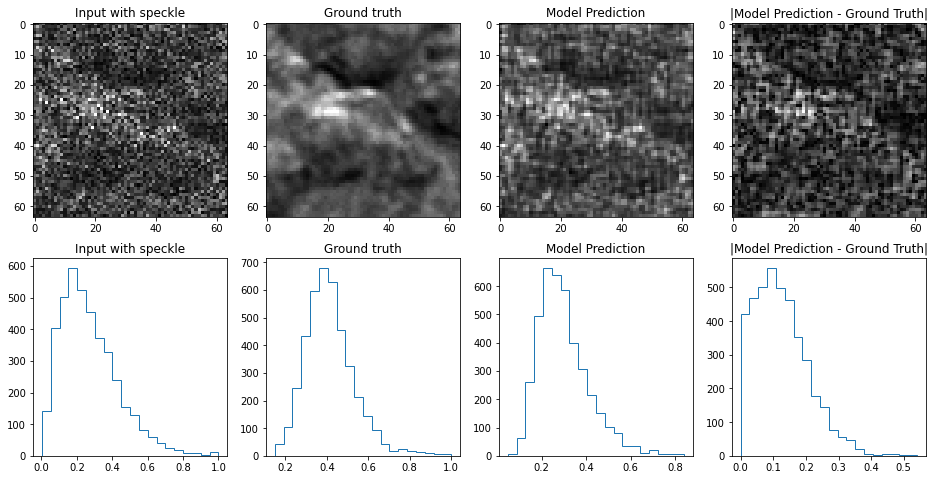

-------------------------------------------------------------------------------------------
Test 39


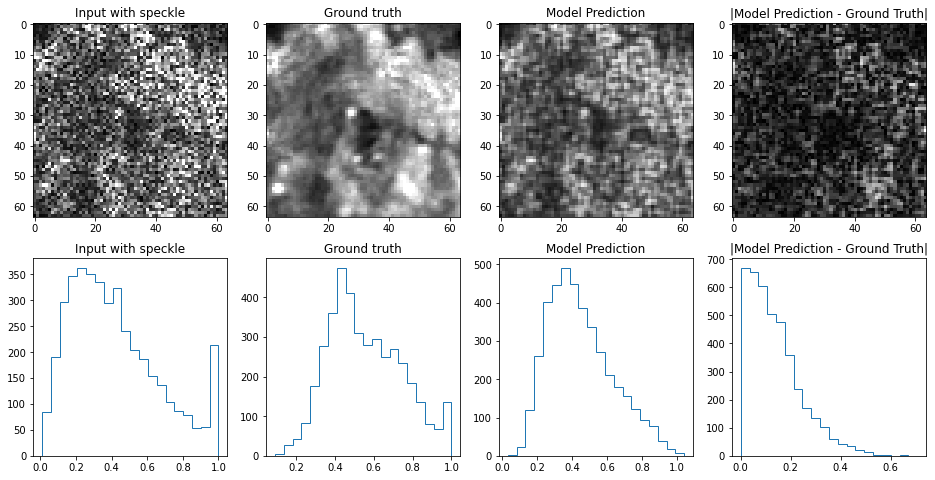

-------------------------------------------------------------------------------------------
Test 40


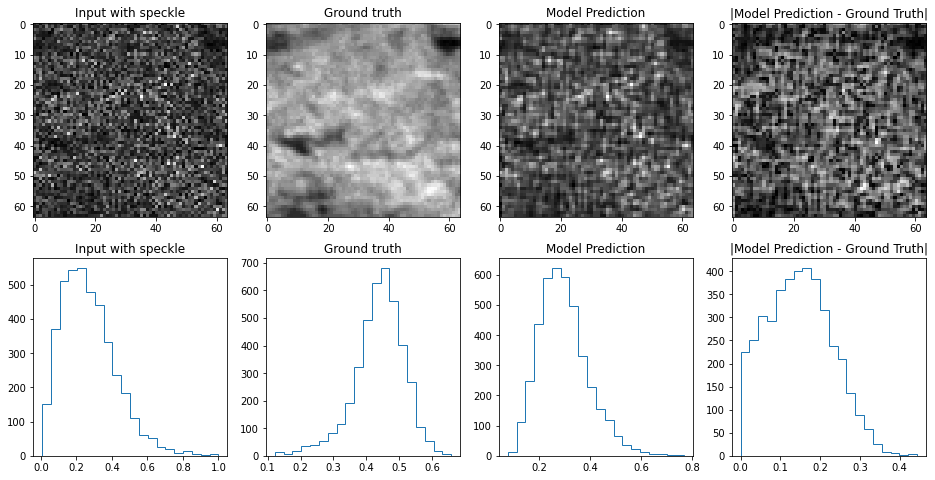

-------------------------------------------------------------------------------------------
Test 41


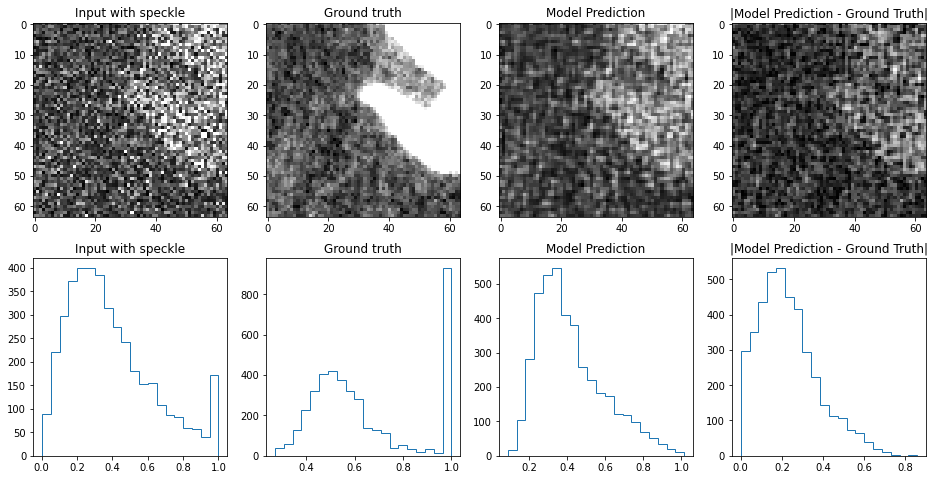

-------------------------------------------------------------------------------------------
Test 42


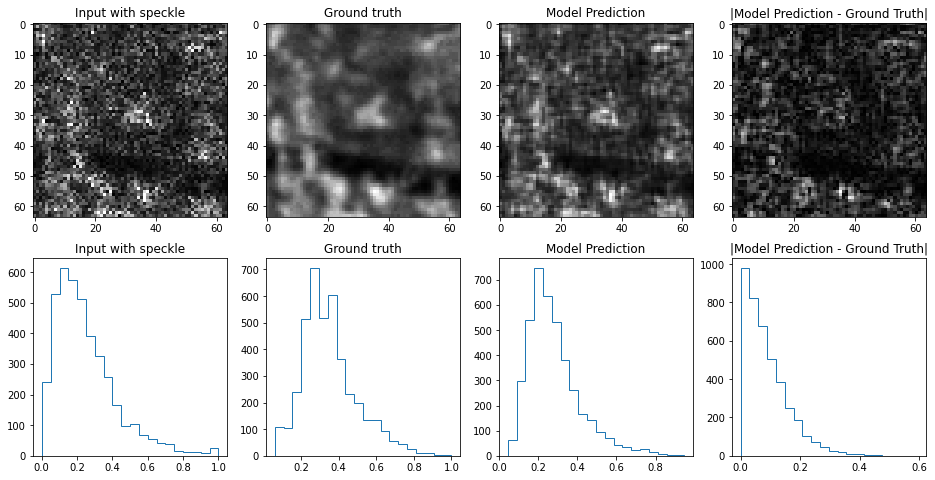

-------------------------------------------------------------------------------------------
Test 43


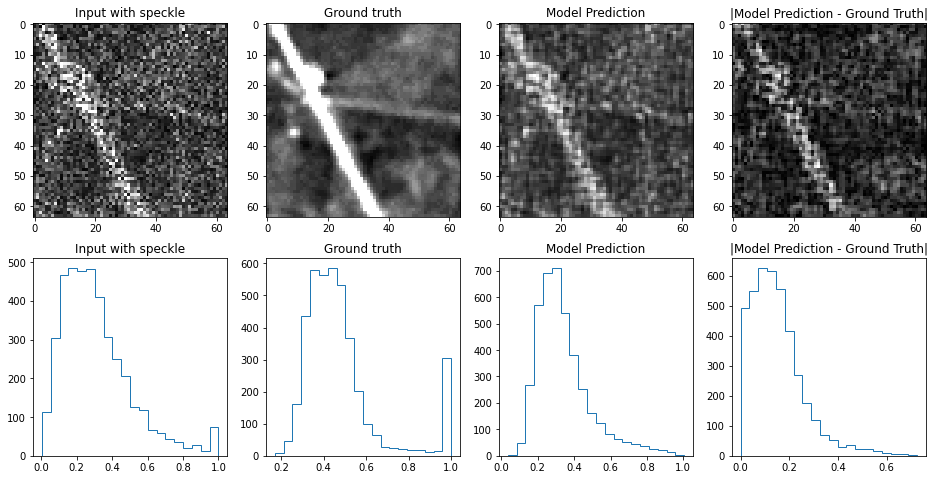

-------------------------------------------------------------------------------------------
Test 44


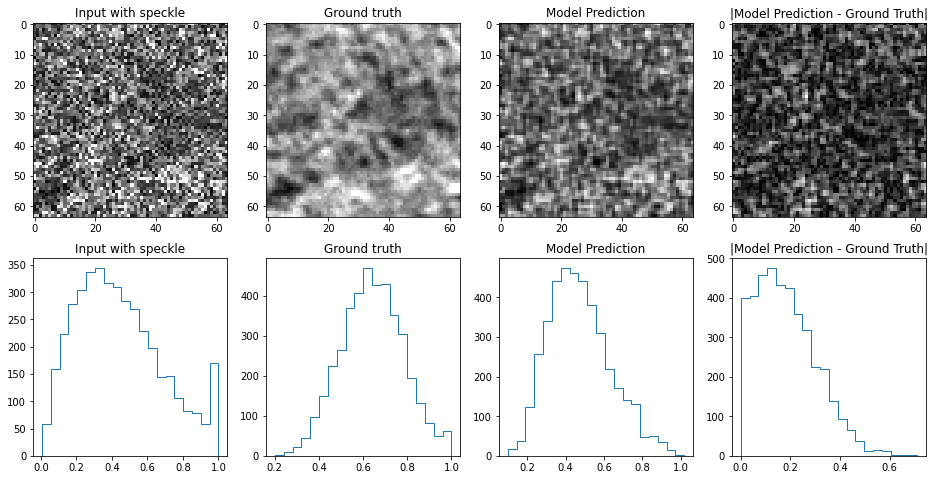

-------------------------------------------------------------------------------------------
Test 45


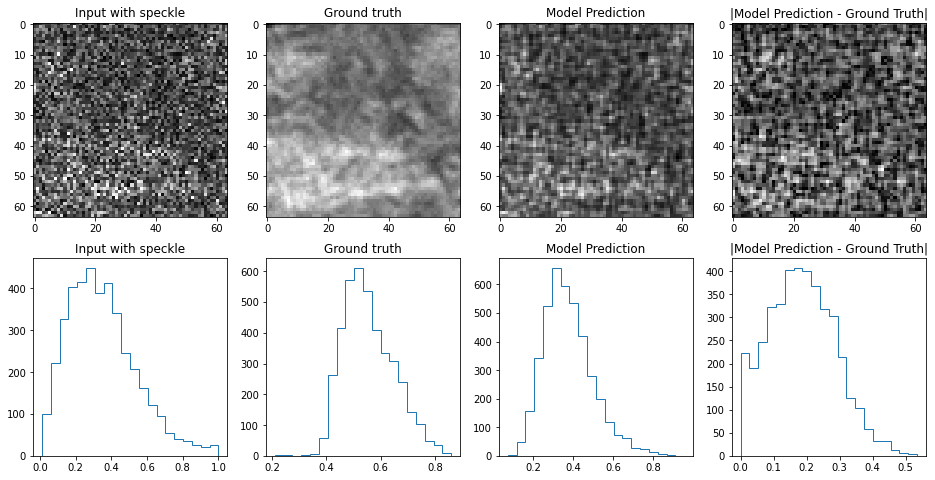

-------------------------------------------------------------------------------------------
Test 46


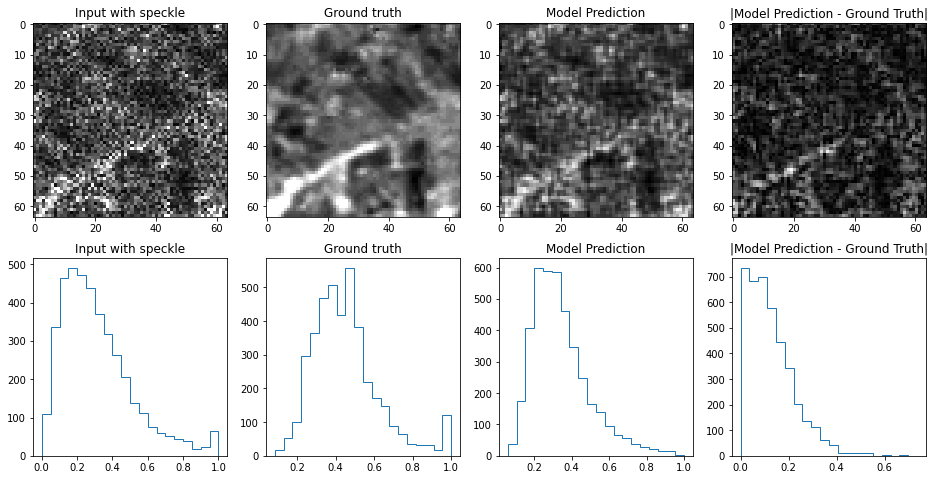

-------------------------------------------------------------------------------------------
Test 47


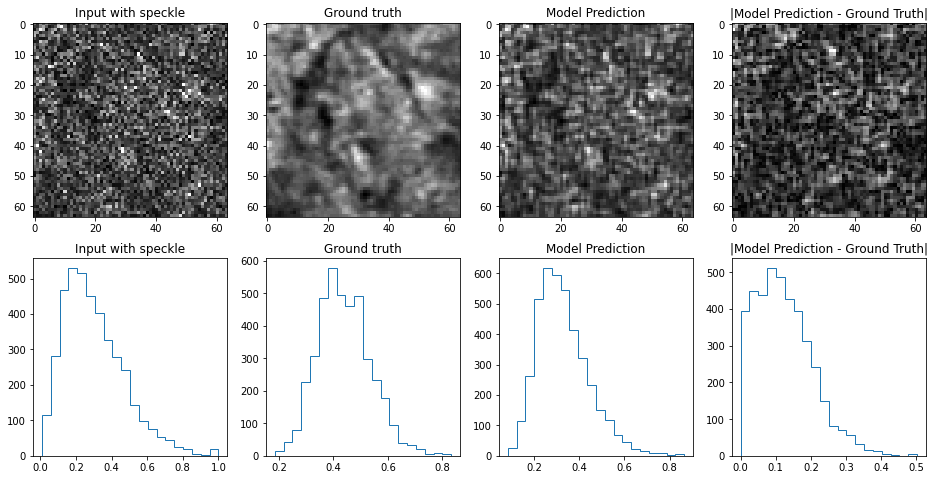

-------------------------------------------------------------------------------------------
Test 48


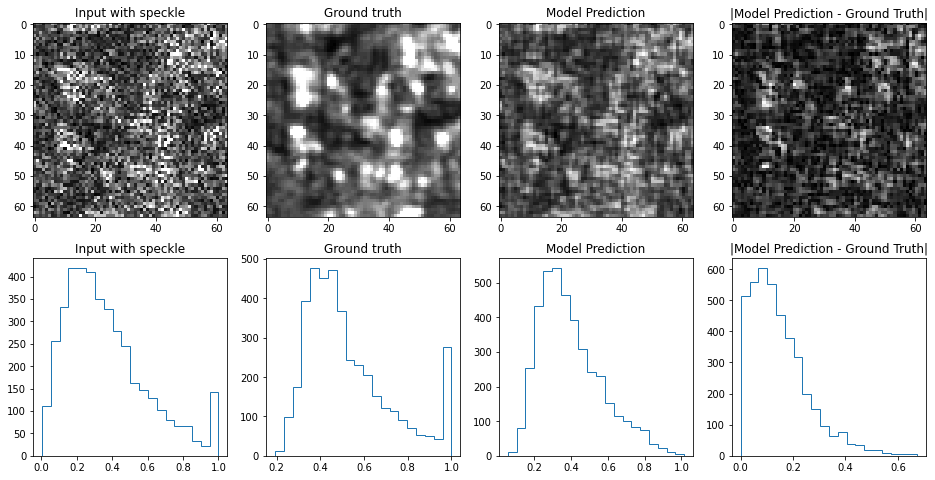

-------------------------------------------------------------------------------------------
Test 49


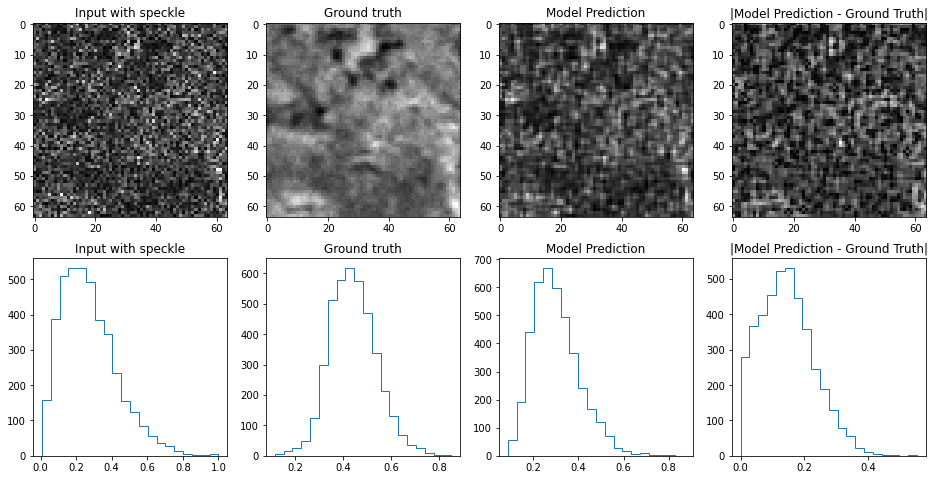

-------------------------------------------------------------------------------------------
Test 50


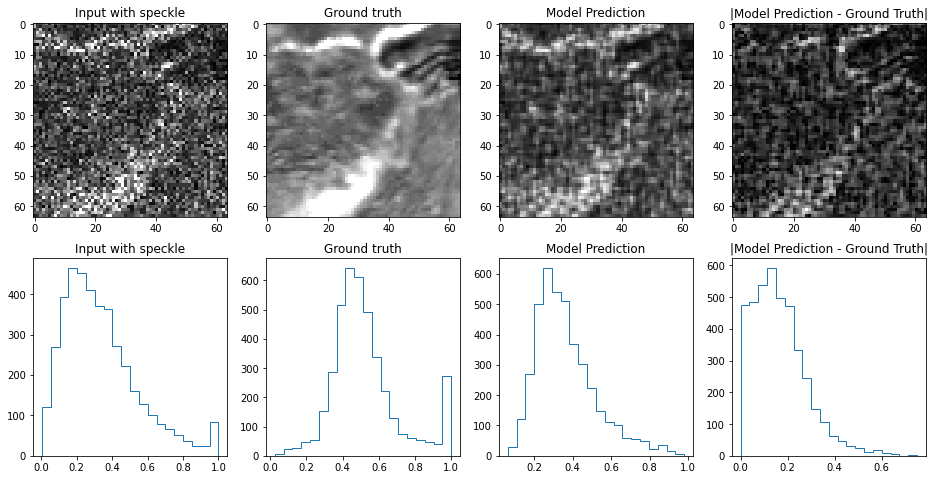

-------------------------------------------------------------------------------------------
Test 51


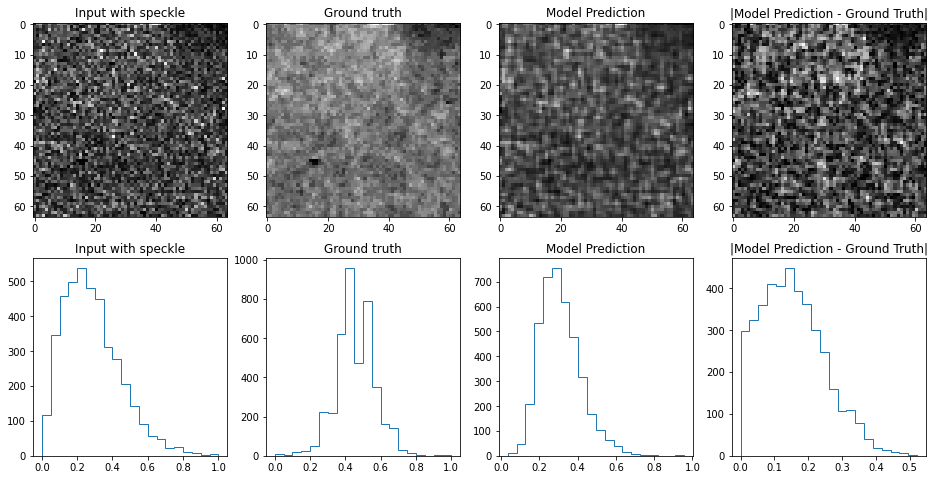

-------------------------------------------------------------------------------------------
Test 52


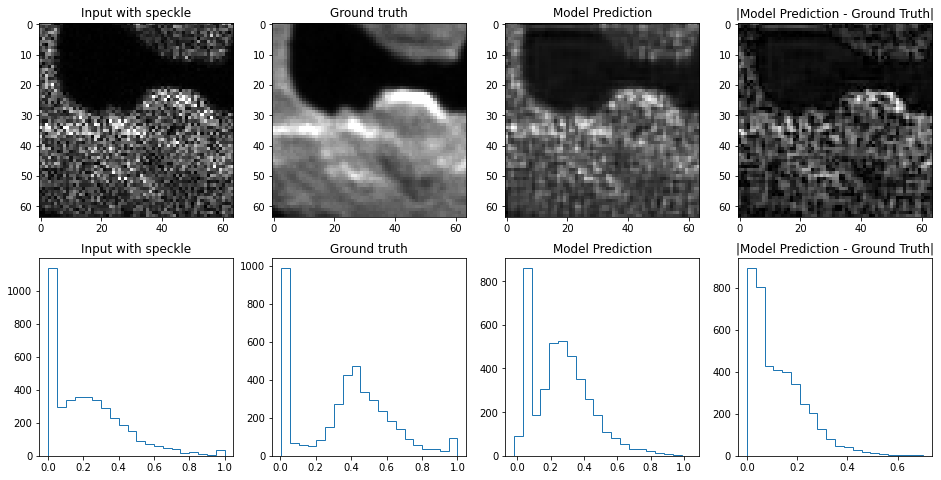

-------------------------------------------------------------------------------------------
Test 53


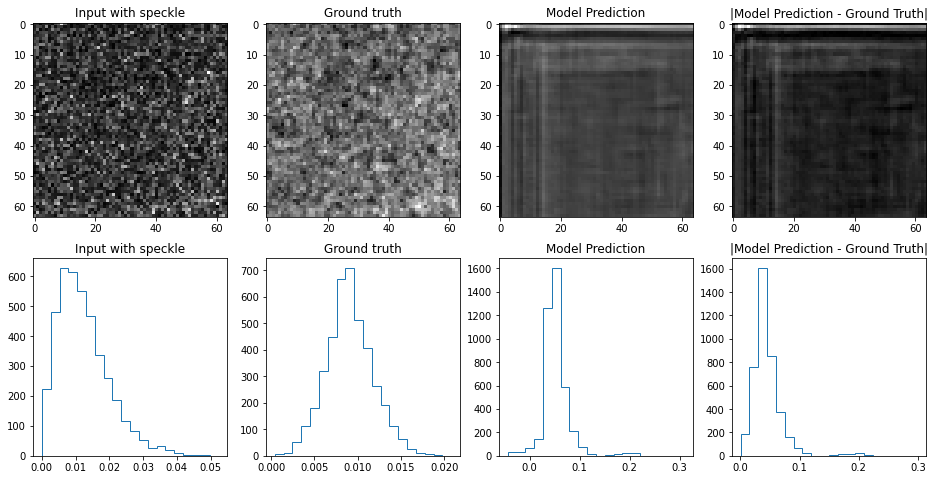

  Test 		 Metric		Grount Truth VS Grount Truth 		 Grount Truth VS Input 		 Grount Truth VS Model Prediction
-------------------------------------------------------------------------------------------------------------------------------------------
   0  		  PSNR 		             inf             		             12.71      		             15.64
   0  		  PSNR 		             1.00             		             0.13      		             0.29
-------------------------------------------------------------------------------------------------------------------------------------------
   1  		  PSNR 		             inf             		             10.19      		             12.36
   1  		  PSNR 		             1.00             		             0.26      		             0.40
-------------------------------------------------------------------------------------------------------------------------------------------
   2  		  PSNR 		             inf             		             19.06      		             23.47
   2  		 

/Users/alessandrosebastianelli/Desktop/CNNSpeckleFilter/filterenv/lib/python3.6/site-packages/skimage/metrics/simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


In [10]:
plot_model_results(batch_speckle[:,:64,:64,...], batch_clean[:,:64,:64,...], pred[0][:,:64,:64,...])
compute_metrics(batch_speckle[:,:64,:64,...], batch_clean[:,:64,:64,...], pred[0][:,:64,:64,...])